# Coffee Data Analysis and Visualization

## By Dylan Benson

## Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#ML
from prophet import Prophet
sns.set(font_scale=1.5)

## Read in and prepare data

In [3]:
pptg = pd.read_csv('./data/prices-paid-to-growers.csv')
rp = pd.read_csv('./data/retail-prices.csv')
cc = pd.read_csv('./data/Coffee-characteristics.csv')
cc = cc.drop(columns=['Farm.Name', 'Lot.Number', 'Certification.Address', 'Certification.Contact', 'Altitude', 'Region', 'Species', 'Mill', 'ICO.Number'])
dcc = pd.read_csv('./data/Domestic_Coffee_Consumption.csv')
dc = pd.read_csv('./data/domestic-consumption.csv')
tp = pd.read_csv('./data/total-production.csv')

In [4]:
#define directory paths

df_paths=[
    "./data/domestic-consumption.csv",
    "./data/exports-calendar-year.csv",
    "./data/exports-crop-year.csv",
    "./data/gross-opening-stocks.csv",
    "./data/total-production.csv"
]

dfs=[pd.read_csv(df_path) for df_path in df_paths]

#define function making mean value of every column and attaching it to country
def get_means(df):
    df=df.copy()
    countries=df[df.columns[0]]
    mean=df.mean(axis=1)
    df=pd.concat([countries,mean],axis=1)
    df.columns=['country',countries.name]
    return df

In [5]:
#define function that creates data frames
def make_df(dfs):
    
    # Process all DataFrames
    processed_dfs = []
    for df in dfs:
        processed_dfs.append(get_means(df))
        
    # Merge DataFrames
    df = processed_dfs[0]
    
    for i in range(1, len(processed_dfs)):
        df = df.merge(processed_dfs[i], on='country')
    
    return df

data=make_df(dfs)

/tmp/ipykernel_85083/1234719787.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean=df.mean(axis=1)
/tmp/ipykernel_85083/1234719787.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean=df.mean(axis=1)
/tmp/ipykernel_85083/1234719787.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean=df.mean(axis=1)
/tmp/ipykernel_85083/1234719787.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version thi

In [6]:
##rename columns and output to same csv (already done, doesn't need rerunning)
#df = df.rename(columns={'1990/91': '1990', '1991/92': '1991', '1992/93': '1992', '1993/94': '1993', '1994/95': '1994', '1995/96': '1995', '1996/97': '1996', '1997/98': '1997', '1998/99': '1998', '1999/00': '1999', '2000/01': '2000', '2001/02': '2001', '2002/03': '2002', '2003/04': '2003', '2004/05': '2004', '2005/06': '2005', '2006/07': '2006', '2007/08': '2007', '2008/09': '2008', '2009/10': '2009', '2010/11': '2010', '2011/12': '2011', '2012/13': '2012', '2013/14': '2013', '2014/15': '2014', '2015/16': '2015', '2016/17': '2016', '2017/18': '2017', '2018/19': '2018', '2019/20': '2019'})
#df.to_csv('Domestic_Coffee_Consumption.csv')

#Ensure no null values exist in our data
data.isna().sum() #returns False for all
data = data.dropna()

#Ensure no duplicate rows exist in our data
data.loc[data.duplicated()] #Nothing returned
data = data.drop_duplicates()

#reset data frame and index, sorting by domestic consumption
data = data.sort_values(by='domestic_consumption', ascending=False)
data = data.reset_index(drop=True)
data.head()

country  domestic_consumption       exports  exports_crop_year  \
0       Brazil          15234.310345  25706.195606       25919.128803   
1    Indonesia           2662.137931   5878.047357        5879.061059   
2     Ethiopia           2529.034483   2257.551574        2326.651490   
3       Mexico           1749.517241   3143.855086        3109.249886   
4  Philippines           1501.310345     29.944000          26.203414   

   gross_opening_stocks  total_production  
0          23213.206897      41067.783976  
1            690.114655       8452.302438  
2           2044.586207       4880.789417  
3            598.732759       4376.146438  
4            563.620690        501.272379

## Analysis and Visualization

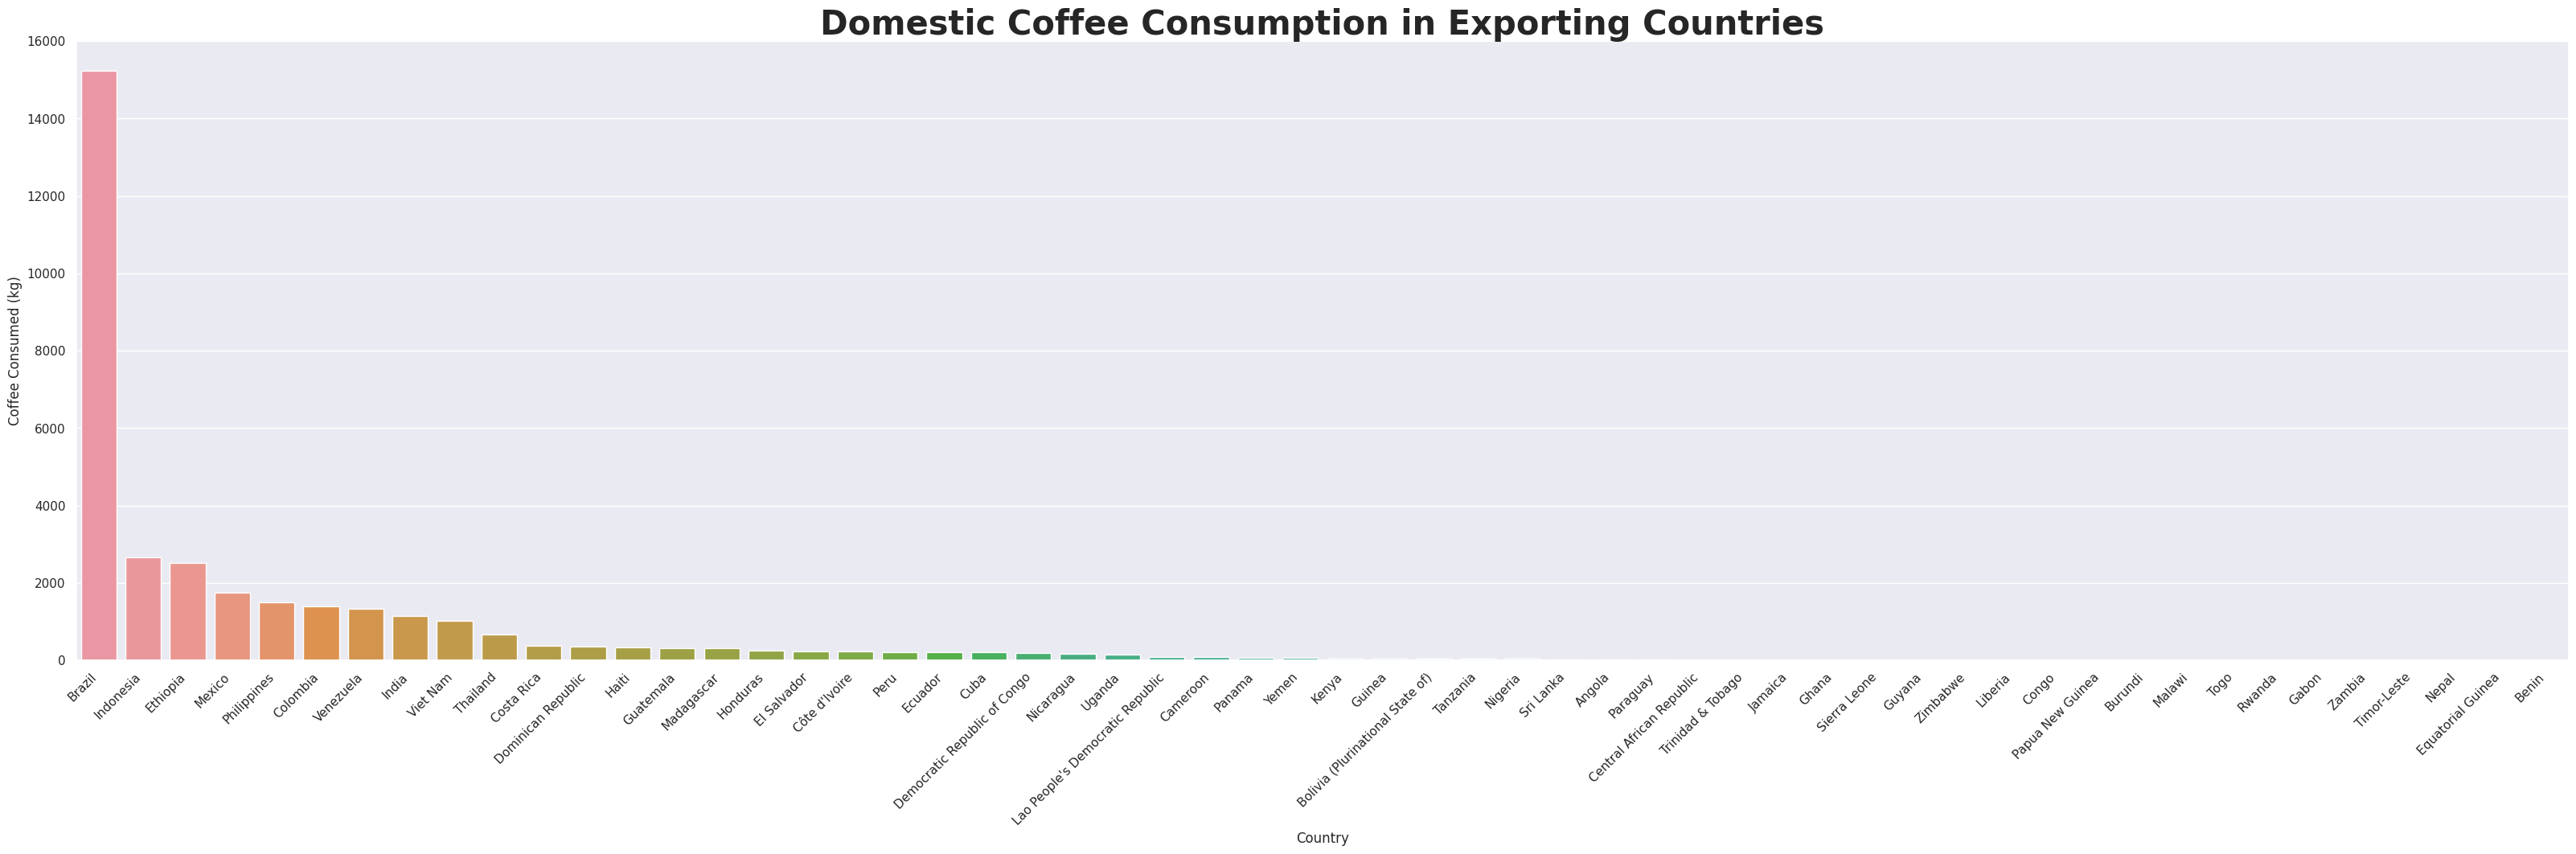

In [7]:
sns.set(rc={"figure.figsize":(40, 10)})
consume_barplot = sns.barplot(x=data['country'], y = data['domestic_consumption'])
consume_barplot.set_ylabel('Coffee Consumed (kg)')
consume_barplot.set_xlabel('Country')
consume_barplot.set_title('Domestic Coffee Consumption in Exporting Countries', fontdict={'size': 30, 'weight': 'bold'})
consume_barplot.set_xticklabels(consume_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylim(0,16000)
plt.show()

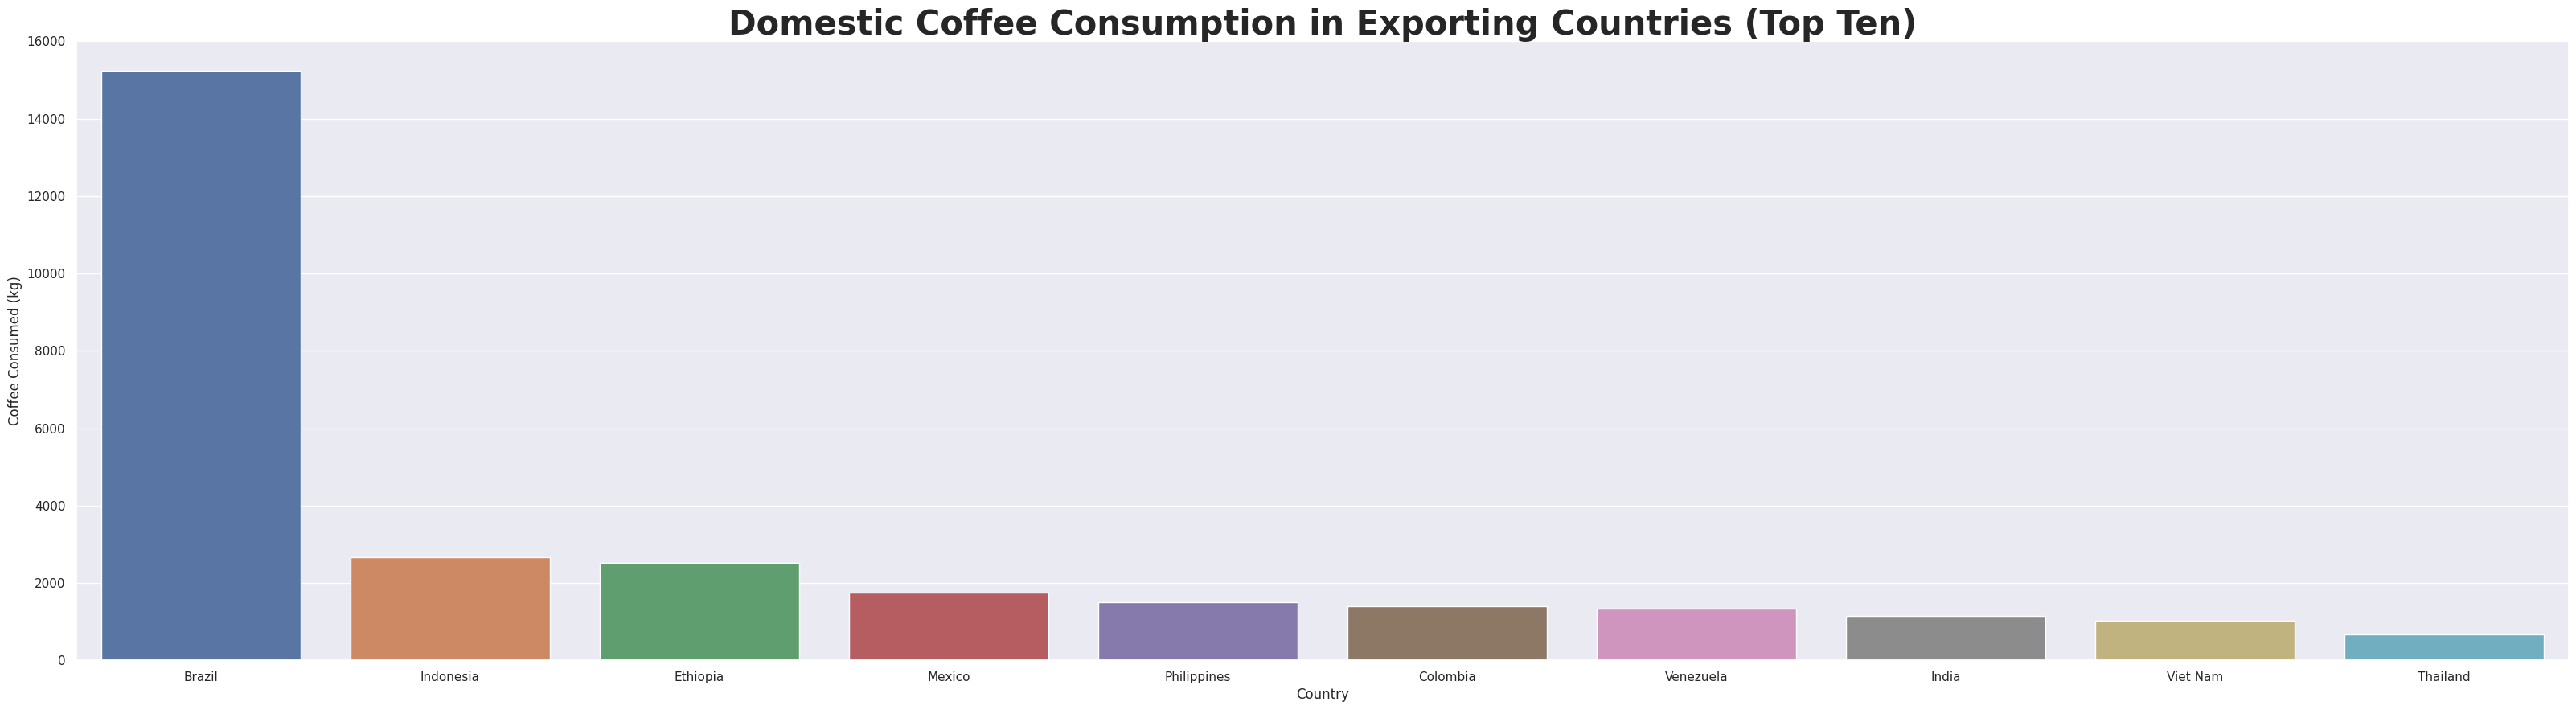

In [8]:
#Create bar graph of top ten Countries by coffee consumption
top_ten_consume = data.head(10)
sns.set(rc={"figure.figsize":(40, 10)})
consume_topten_barplot = sns.barplot(x=top_ten_consume['country'], y = top_ten_consume['domestic_consumption'])
consume_topten_barplot.set_ylabel('Coffee Consumed (kg)')
consume_topten_barplot.set_xlabel('Country')
consume_topten_barplot.set_title('Domestic Coffee Consumption in Exporting Countries (Top Ten)', fontdict={'size': 30, 'weight': 'bold'})
plt.ylim(0,16000)
plt.show()

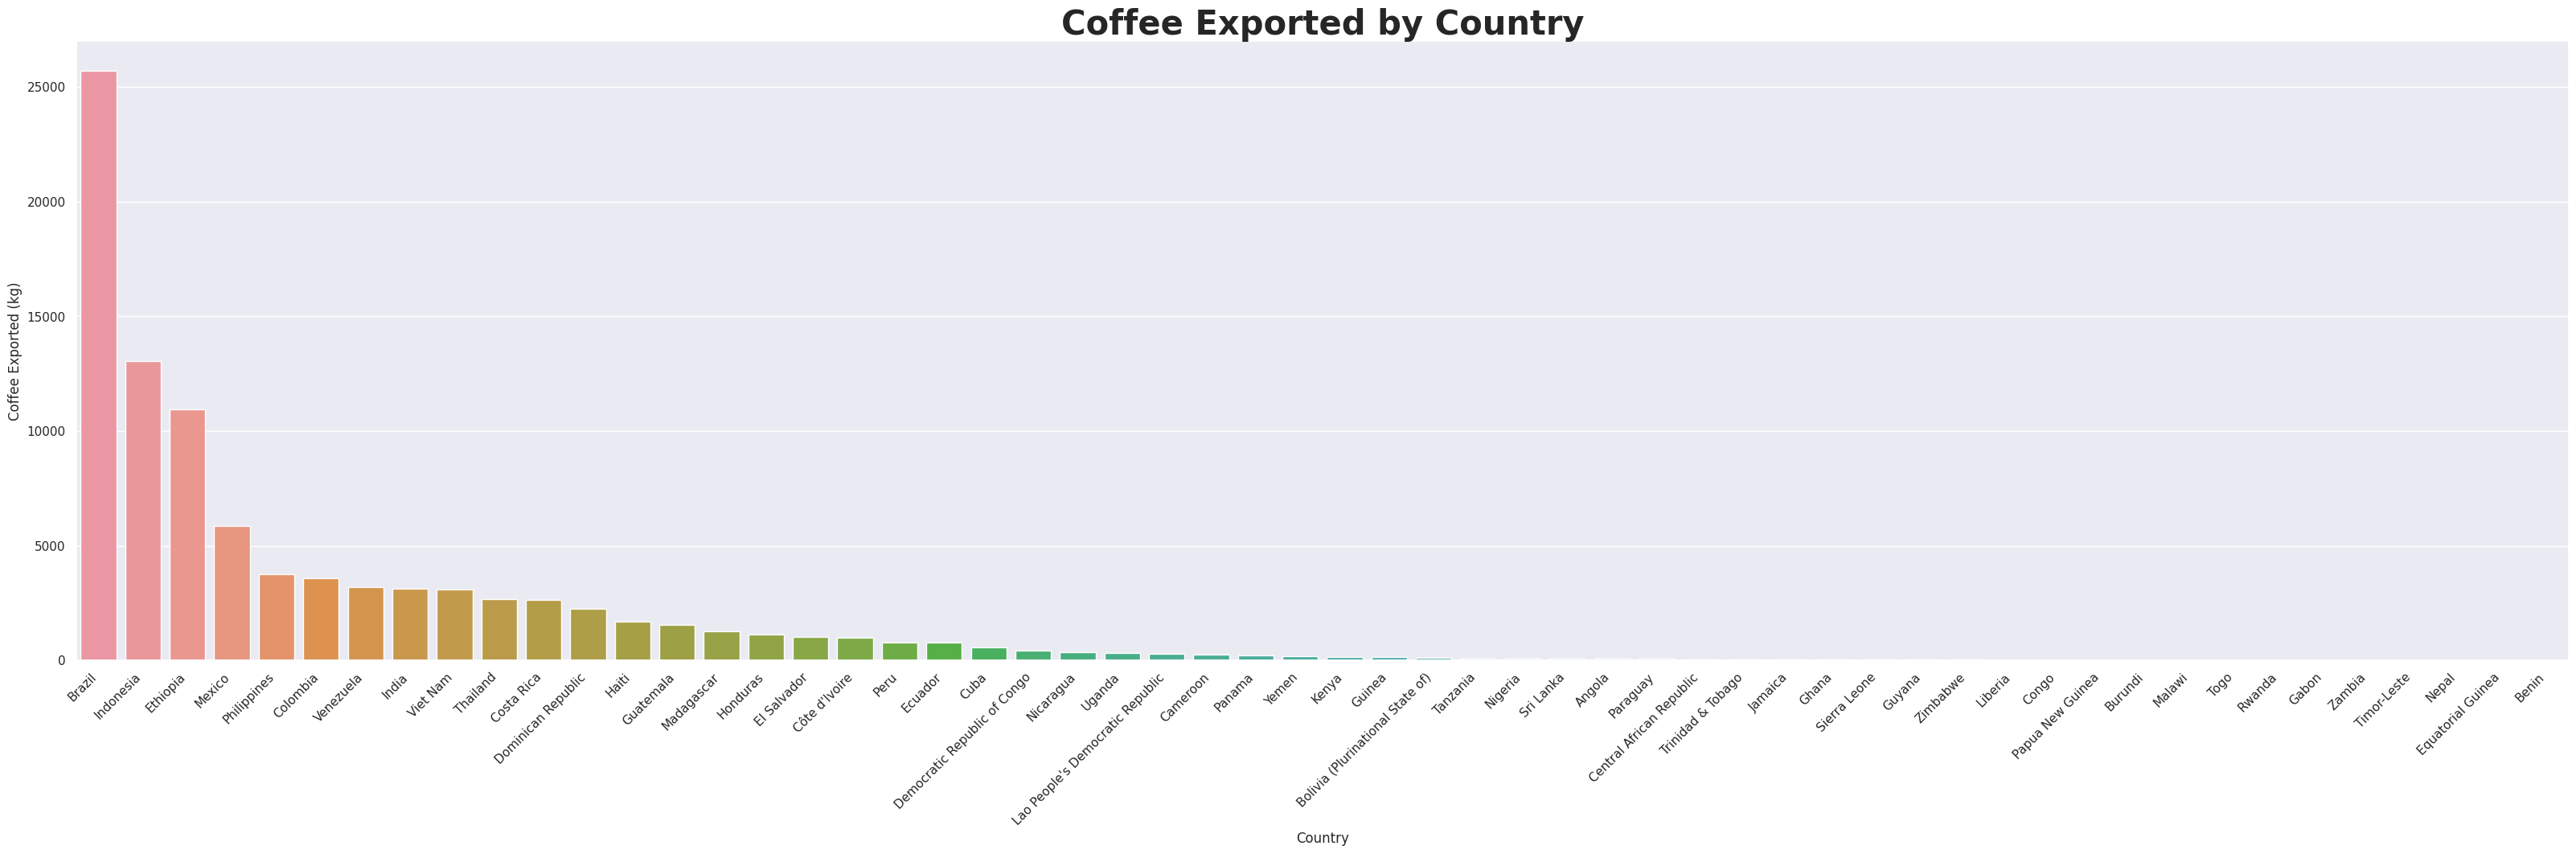

In [9]:
#Create bar graph of top ten Countries by coffee exports
data = data.sort_values(by='exports', ascending=False)
export_barplot = sns.barplot(x=data['country'], y = data['exports'])
export_barplot.set_ylabel('Coffee Exported (kg)')
export_barplot.set_xlabel('Country')
export_barplot.set_title('Coffee Exported by Country', fontdict={'size': 30, 'weight': 'bold'})
export_barplot.set_xticklabels(consume_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylim(0,27000)
plt.show()

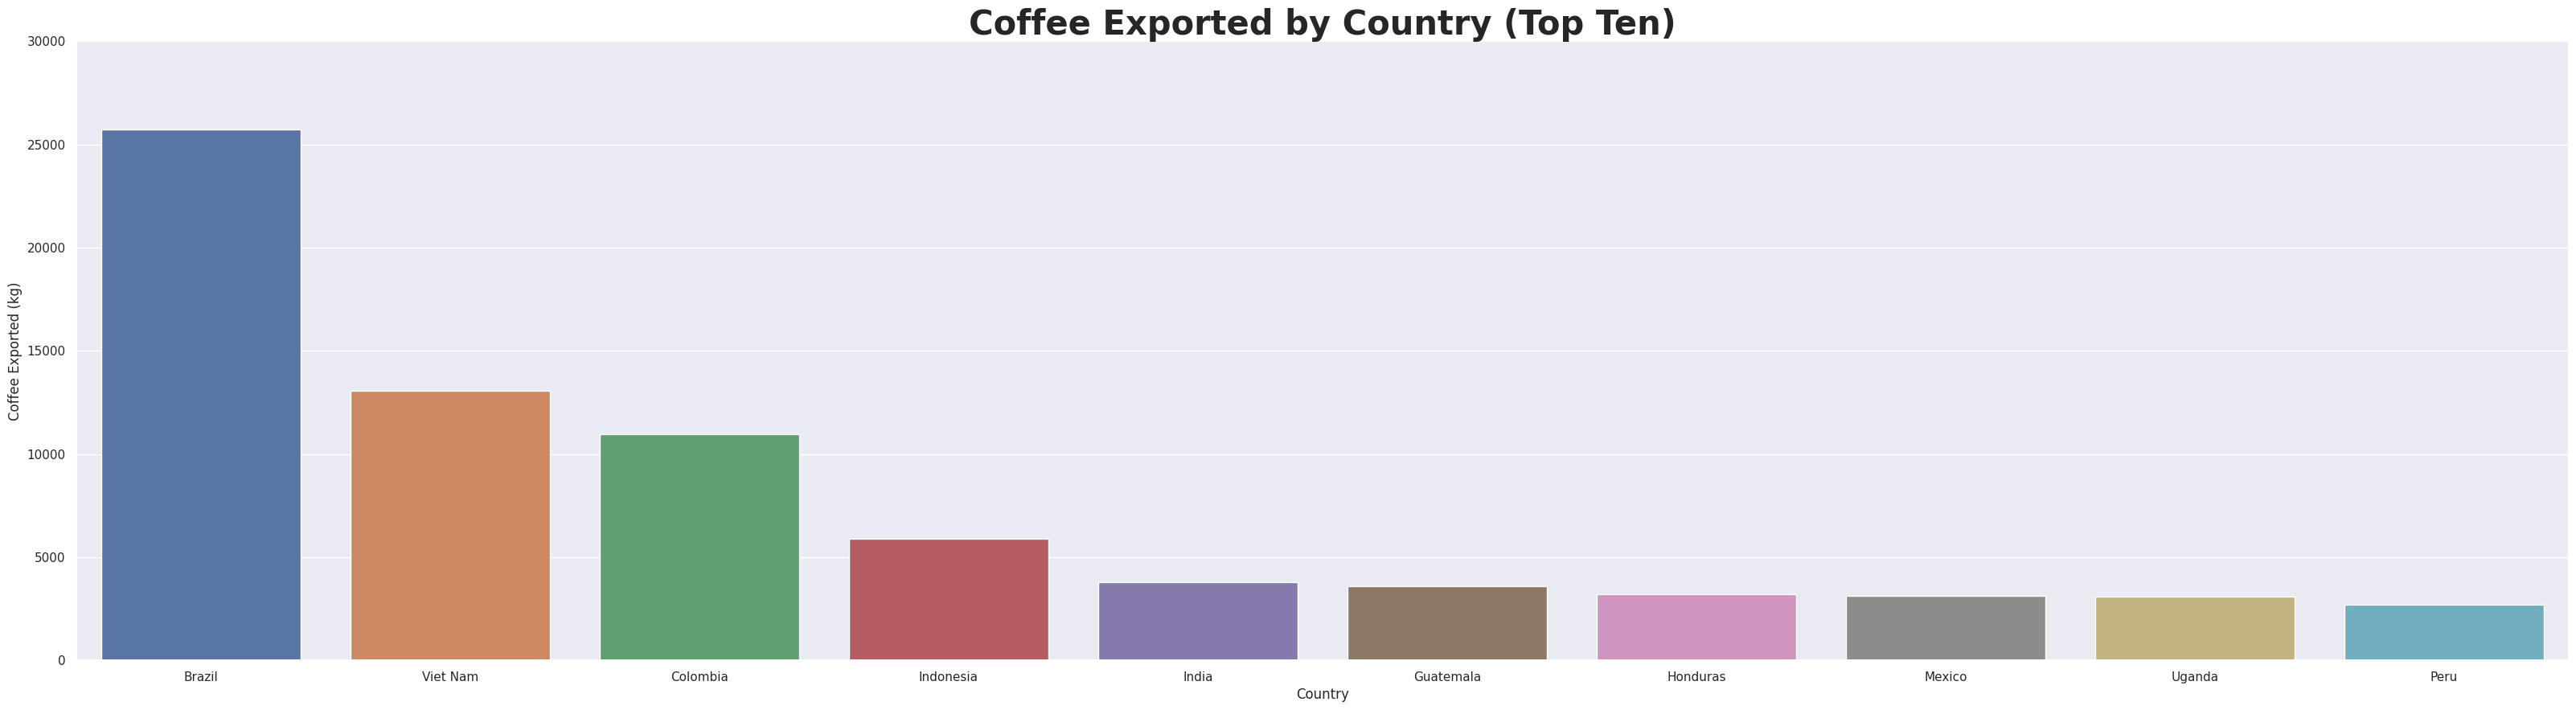

In [10]:
#Create bar graph of top ten Countries by coffee exports
data = data.sort_values(by='exports', ascending=False)
top_ten_export = data.head(10)
export_topten_barplot = sns.barplot(x=top_ten_export['country'], y = top_ten_export['exports'])
export_topten_barplot.set_ylabel('Coffee Exported (kg)')
export_topten_barplot.set_xlabel('Country')
export_topten_barplot.set_title('Coffee Exported by Country (Top Ten)', fontdict={'size': 30, 'weight': 'bold'})
plt.ylim(0,30000)
plt.show()

In [11]:
#Drop the outlier in the data (Brazil)
no_brazil = data.drop(data.query("country=='Brazil'").index)
no_brazil = no_brazil.sort_values(by='domestic_consumption', ascending=False)

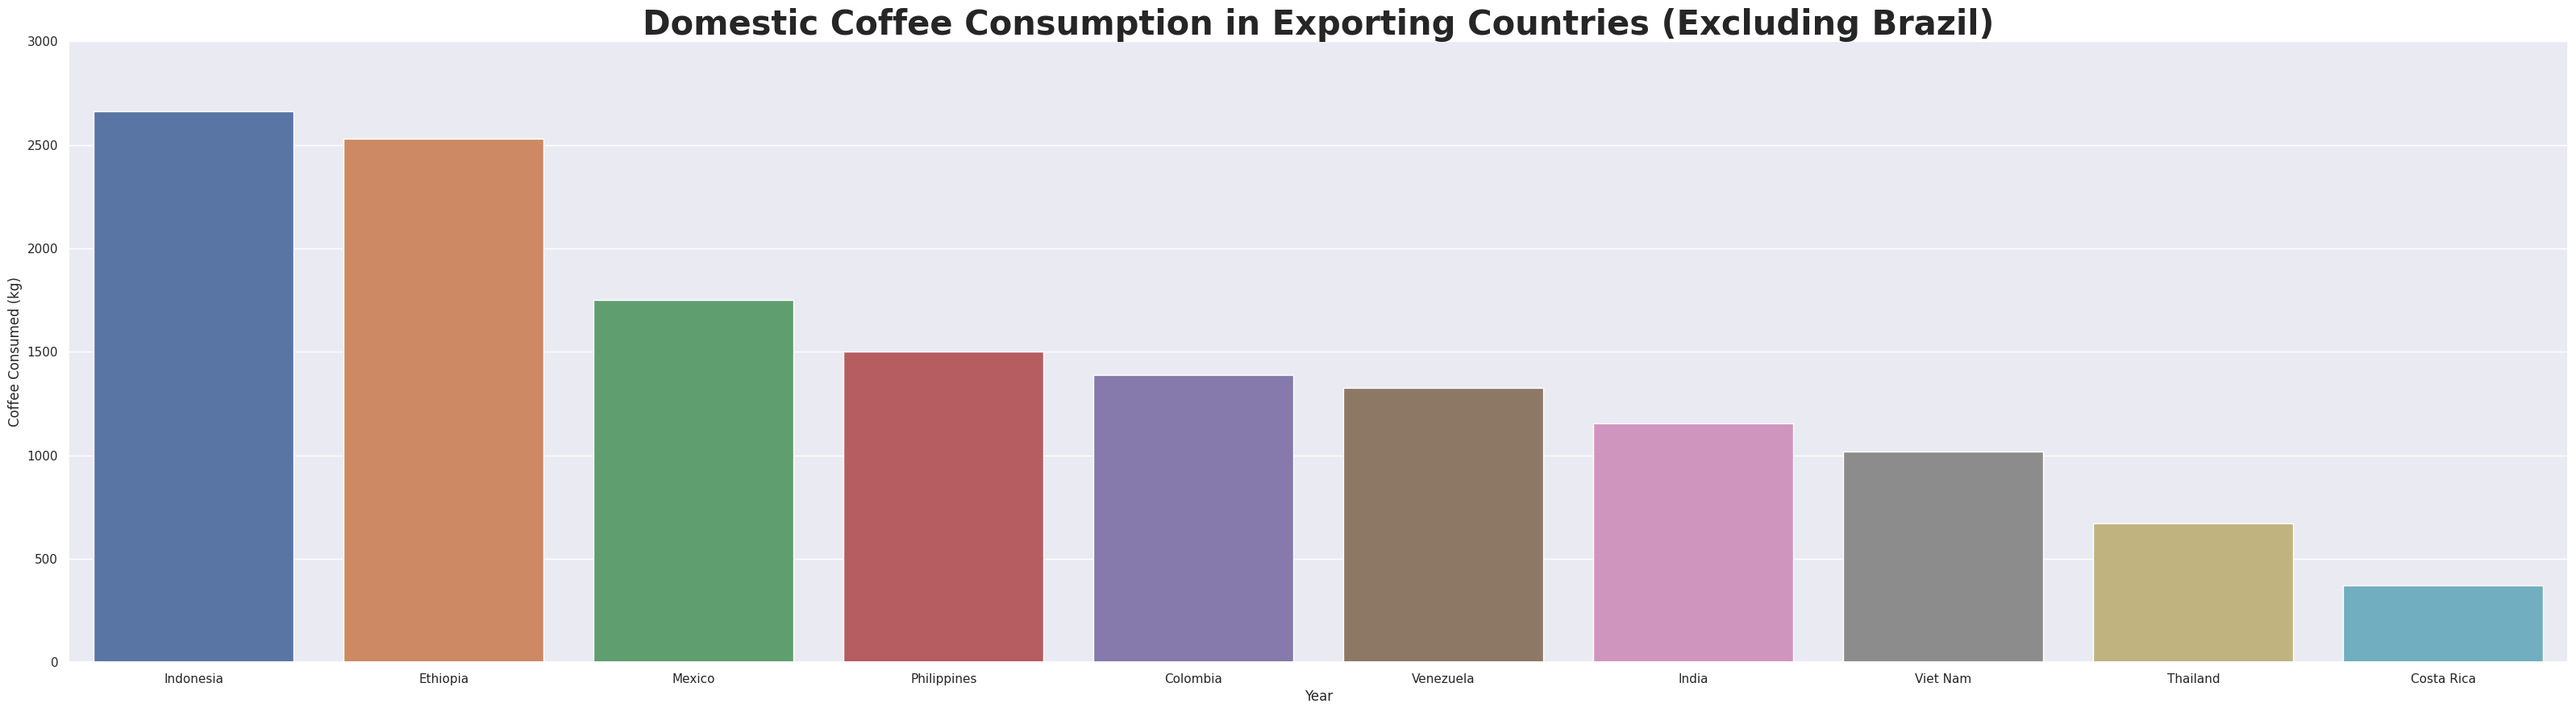

In [12]:
#Create same bar graphs, but excluding Brazil
top_ten_consume = no_brazil.head(10)
sns.set(rc={"figure.figsize":(40, 10)})
consume_barplot = sns.barplot(x=top_ten_consume['country'], y = top_ten_consume['domestic_consumption'], dodge=False)
consume_barplot.set_ylabel('Coffee Consumed (kg)')
consume_barplot.set_xlabel('Year')
consume_barplot.set_title('Domestic Coffee Consumption in Exporting Countries (Excluding Brazil)', fontdict={'size': 30, 'weight': 'bold'})
plt.ylim(0,3000)
plt.show()

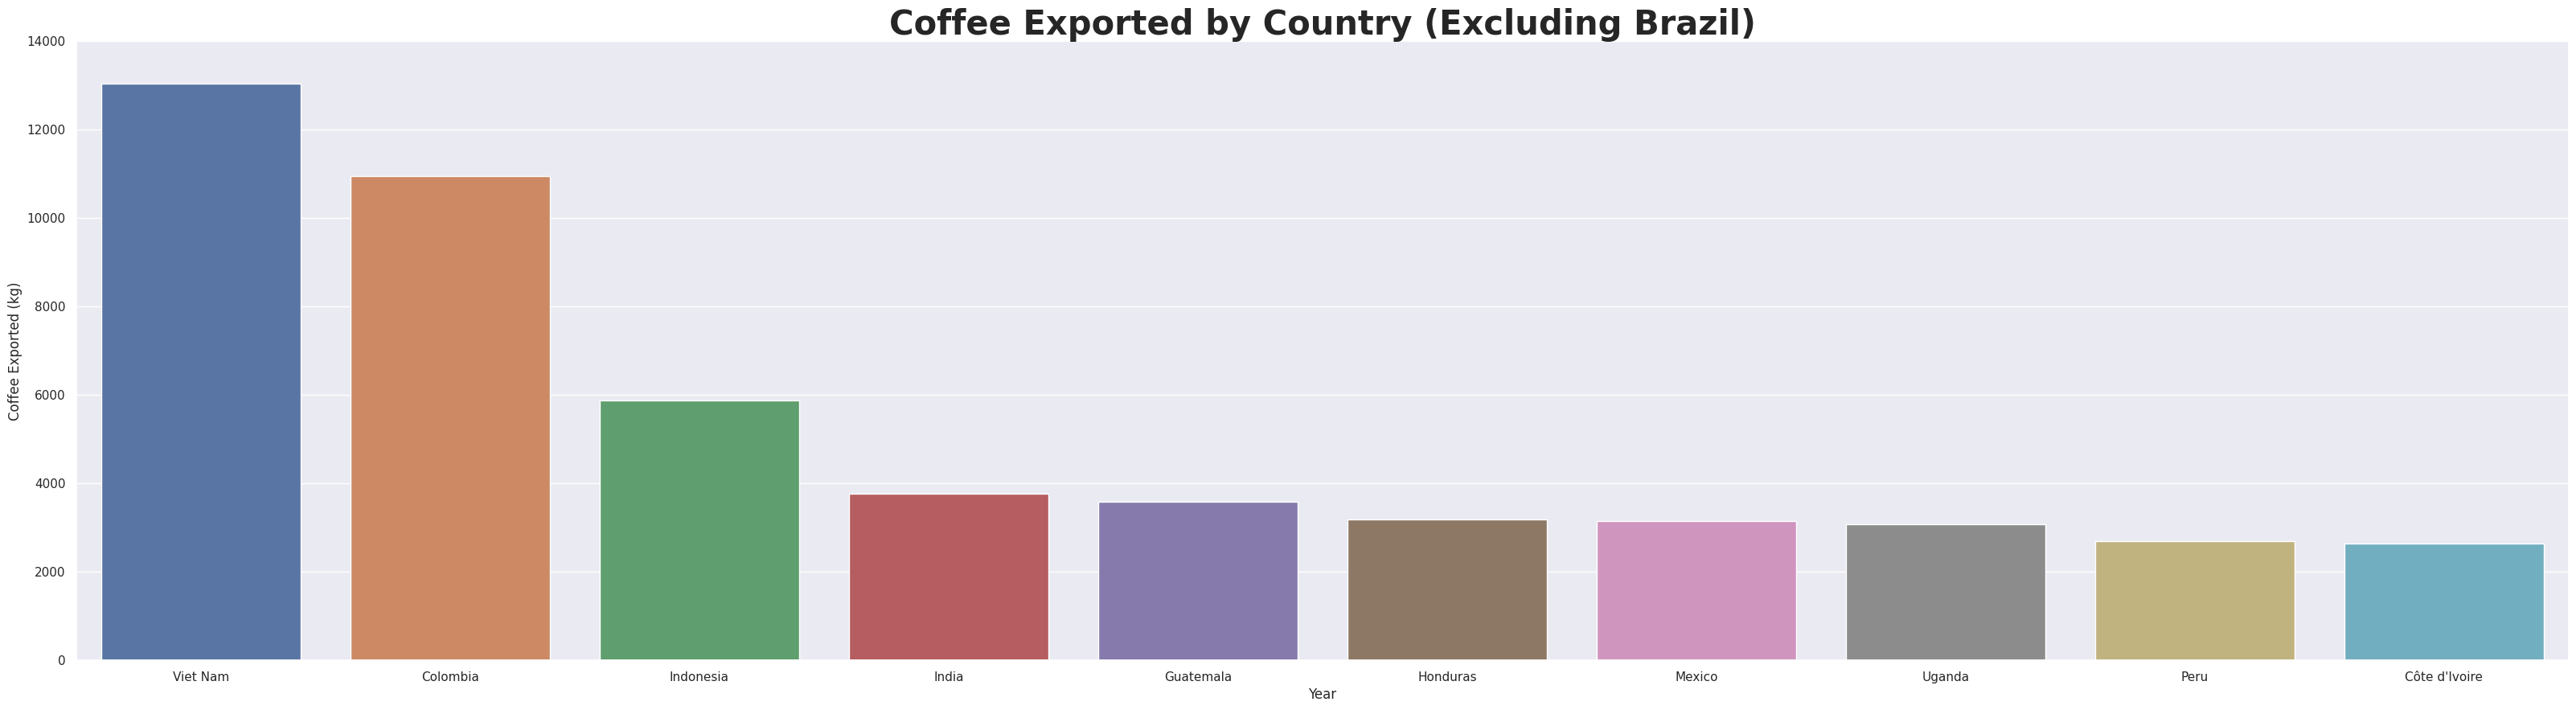

In [13]:
#Create bar graph of top ten Countries by coffee exports
no_brazil = no_brazil.sort_values(by='exports', ascending=False)
top_ten_export = no_brazil.head(10)
export_barplot = sns.barplot(x=top_ten_export['country'], y = top_ten_export['exports'])
export_barplot.set_ylabel('Coffee Exported (kg)')
export_barplot.set_xlabel('Year')
export_barplot.set_title('Coffee Exported by Country (Excluding Brazil)', fontdict={'size': 30, 'weight': 'bold'})
plt.ylim(0,14000)
plt.show()

## Examine Correlation in the data

In [14]:
#Create heatmap of correlated data
stats = data[['exports', 'domestic_consumption', 'exports_crop_year', 'gross_opening_stocks', 'total_production']]
sns.set_theme(style="white")
corr = stats.corr(method = 'pearson',  # The method of correlation
                  min_periods = 1 )
corr.style.background_gradient(cmap='coolwarm')

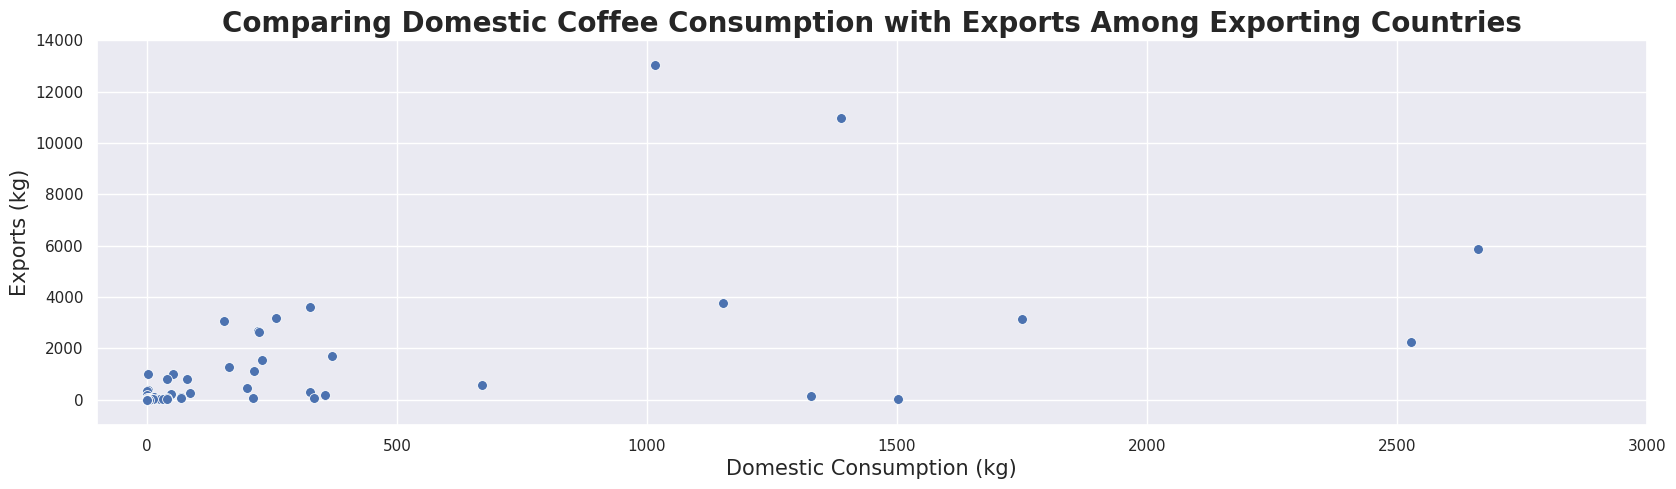

In [15]:
#Scatter plot comparing domestic consumption x exports (excluding Brazil)
sns.set(rc={"figure.figsize":(20, 5)})
scatter = sns.scatterplot(data=no_brazil, x='domestic_consumption', y='exports', legend='auto', s=50)
scatter.set_title("Comparing Domestic Coffee Consumption with Exports Among Exporting Countries", fontdict={'size': 20, 'weight': 'bold'})
scatter.set_xlabel('Domestic Consumption (kg)', fontdict={'size': 15})
scatter.set_ylabel('Exports (kg)', fontdict={'size': 15})
plt.ylim(-1000, 14000)
plt.xlim(-100, 3000)
plt.show()

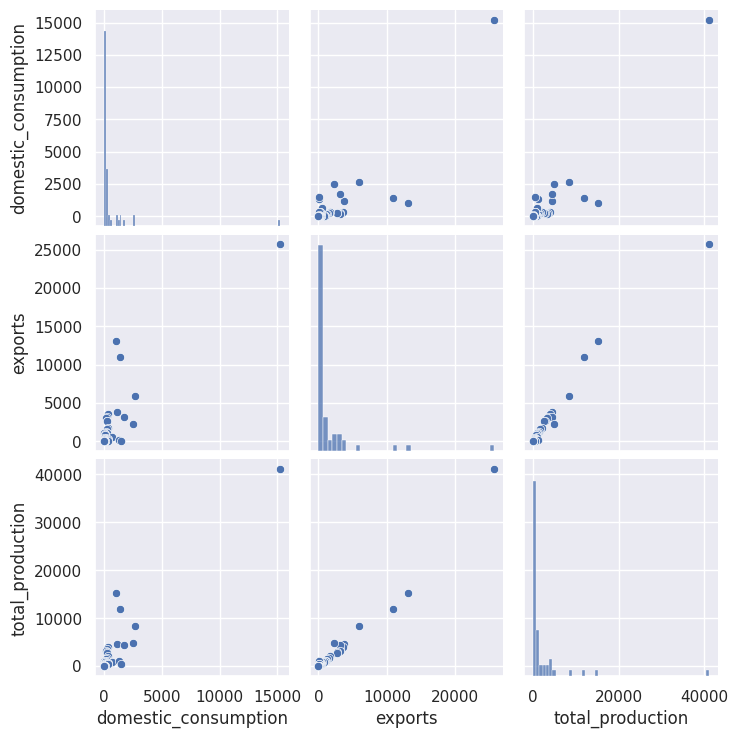

In [16]:
#Create a grid of pairplots between domestic consumption, exports, and production
pairplot = sns.pairplot(data, vars=['domestic_consumption', 'exports', 'total_production'])
plt.show()

In [17]:
#Create new dataframe of coffee types, clean data a bit (dcc = Domestic_Coffee_Consumption.csv)
types = dcc['Coffee type']
types = types.replace({'Robusta/Arabica':'Both'})
types = types.replace({'Arabica/Robusta':'Both'})
pie = types.value_counts()

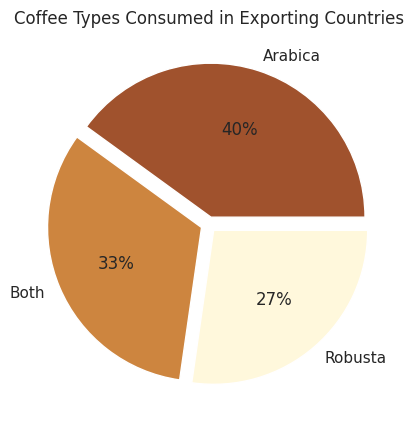

In [18]:
# Defining colors for the pie chart
colors = ['sienna', 'peru', 'cornsilk']
  
# Define the ratio of gap of each fragment in a tuple
x = (0.05, 0.05, 0.05)

#Create pie chart of coffee types
plt.ylabel(None)
pie.plot(kind='pie', title="Coffee Types Consumed in Exporting Countries", autopct='%1.0f%%', colors=colors, explode=x)
plt.ylabel(None)
plt.show()

## Examine Domestic Consumption Over Time

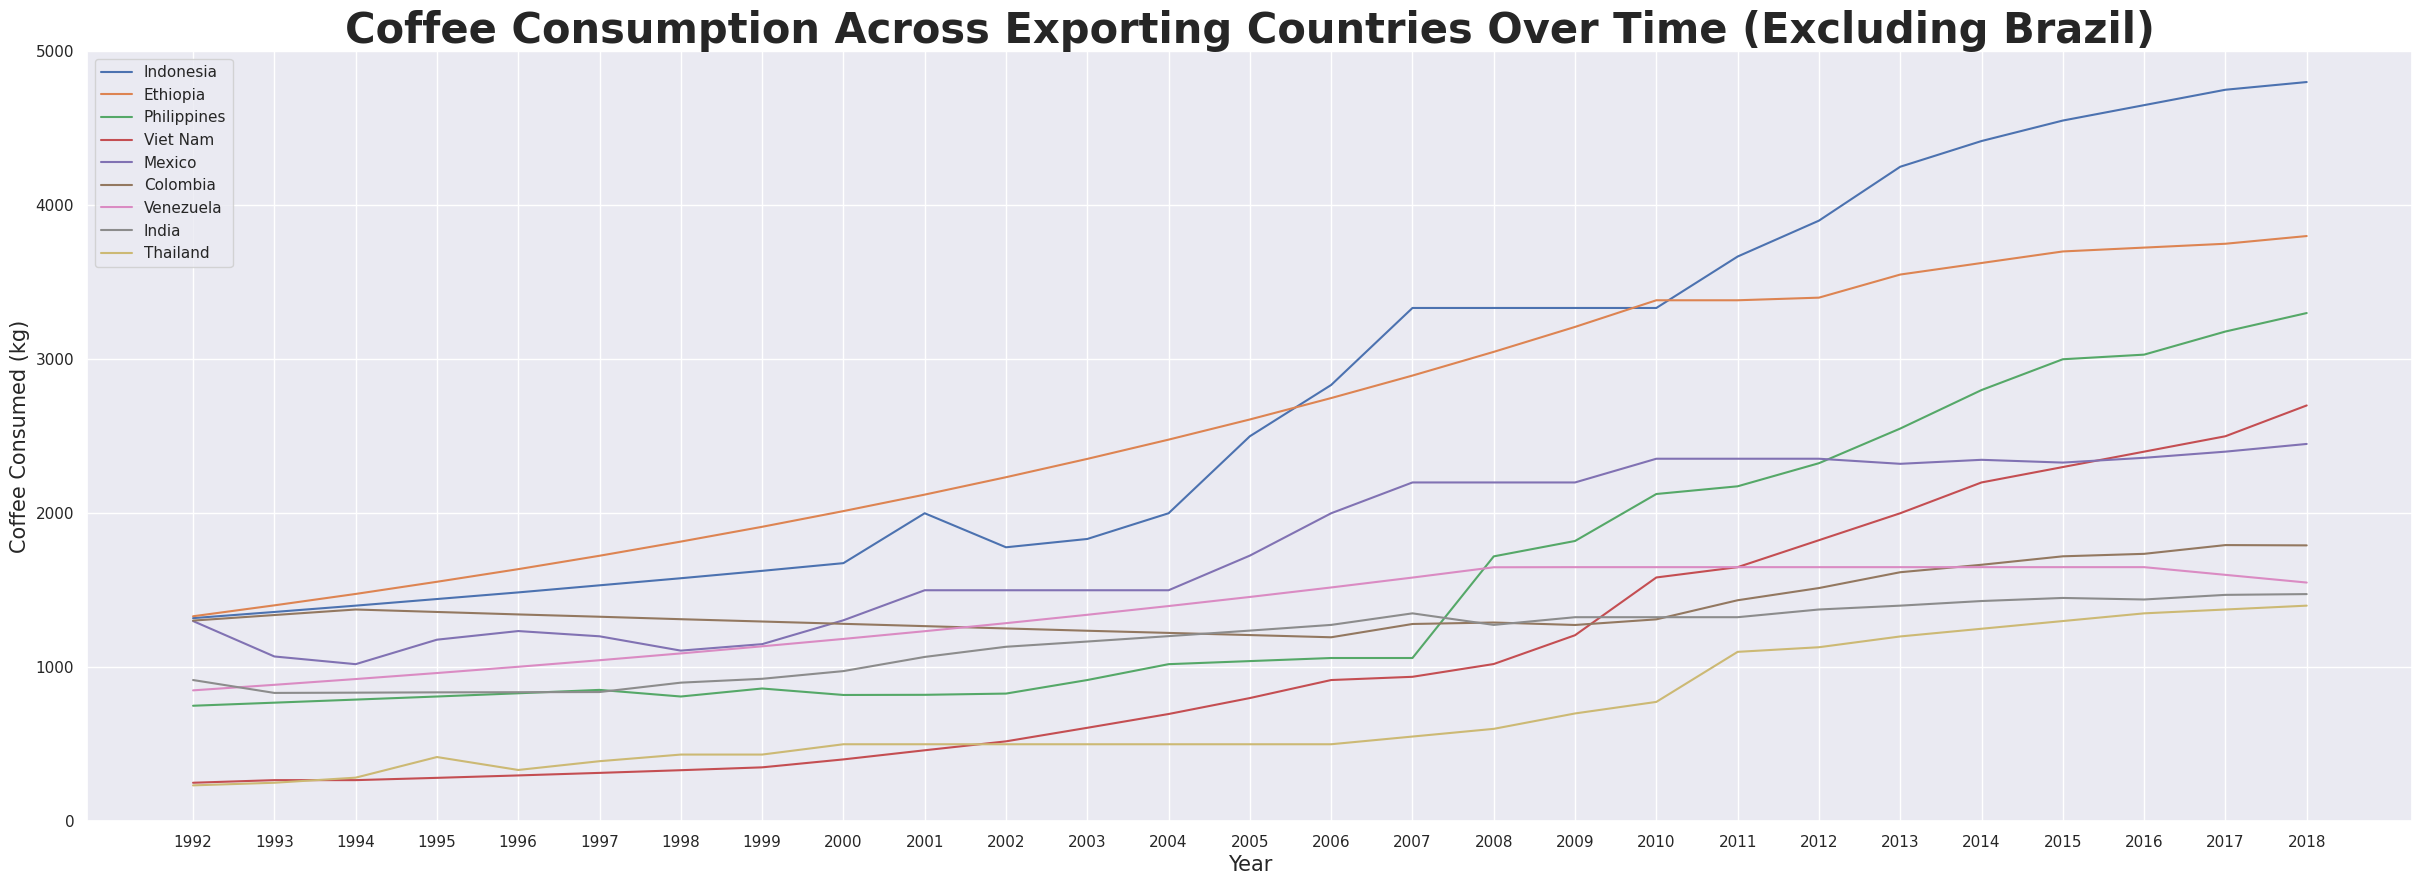

In [19]:
# (dc = domestic-consumption.csv)
#sort by consumption in 2018
dc = dc.sort_values(by='2018', ascending=False)
dc = dc.reset_index(drop=True)
top_ten = dc.head(10)

#Transpose the data frame
pivot = top_ten.transpose()

#rename columns to row 1
pivot.columns = pivot.iloc[0]

#drop first two rows
pivot = pivot.iloc[3:]

#rename index
pivot.index.names = ['Year']

copy = pivot.copy()

#Drop the outlier in the data (Brazil)
copy.drop('Brazil', axis=1, inplace=True) 

top_ten_consume_overtime = copy.copy()

sns.set(rc={"figure.figsize":(30, 10)}) 

consume_plot = sns.lineplot(data=top_ten_consume_overtime, dashes=False)
consume_plot.set_title("Coffee Consumption Across Exporting Countries Over Time (Excluding Brazil)", fontdict={'size': 30, 'weight': 'bold'})
consume_plot.set_xlabel('Year', fontdict={'size': 15})
consume_plot.set_ylabel('Coffee Consumed (kg)', fontdict={'size': 15})
consume_plot.legend()
plt.ylim(0, 5000)
plt.show()

## Examine Production over time

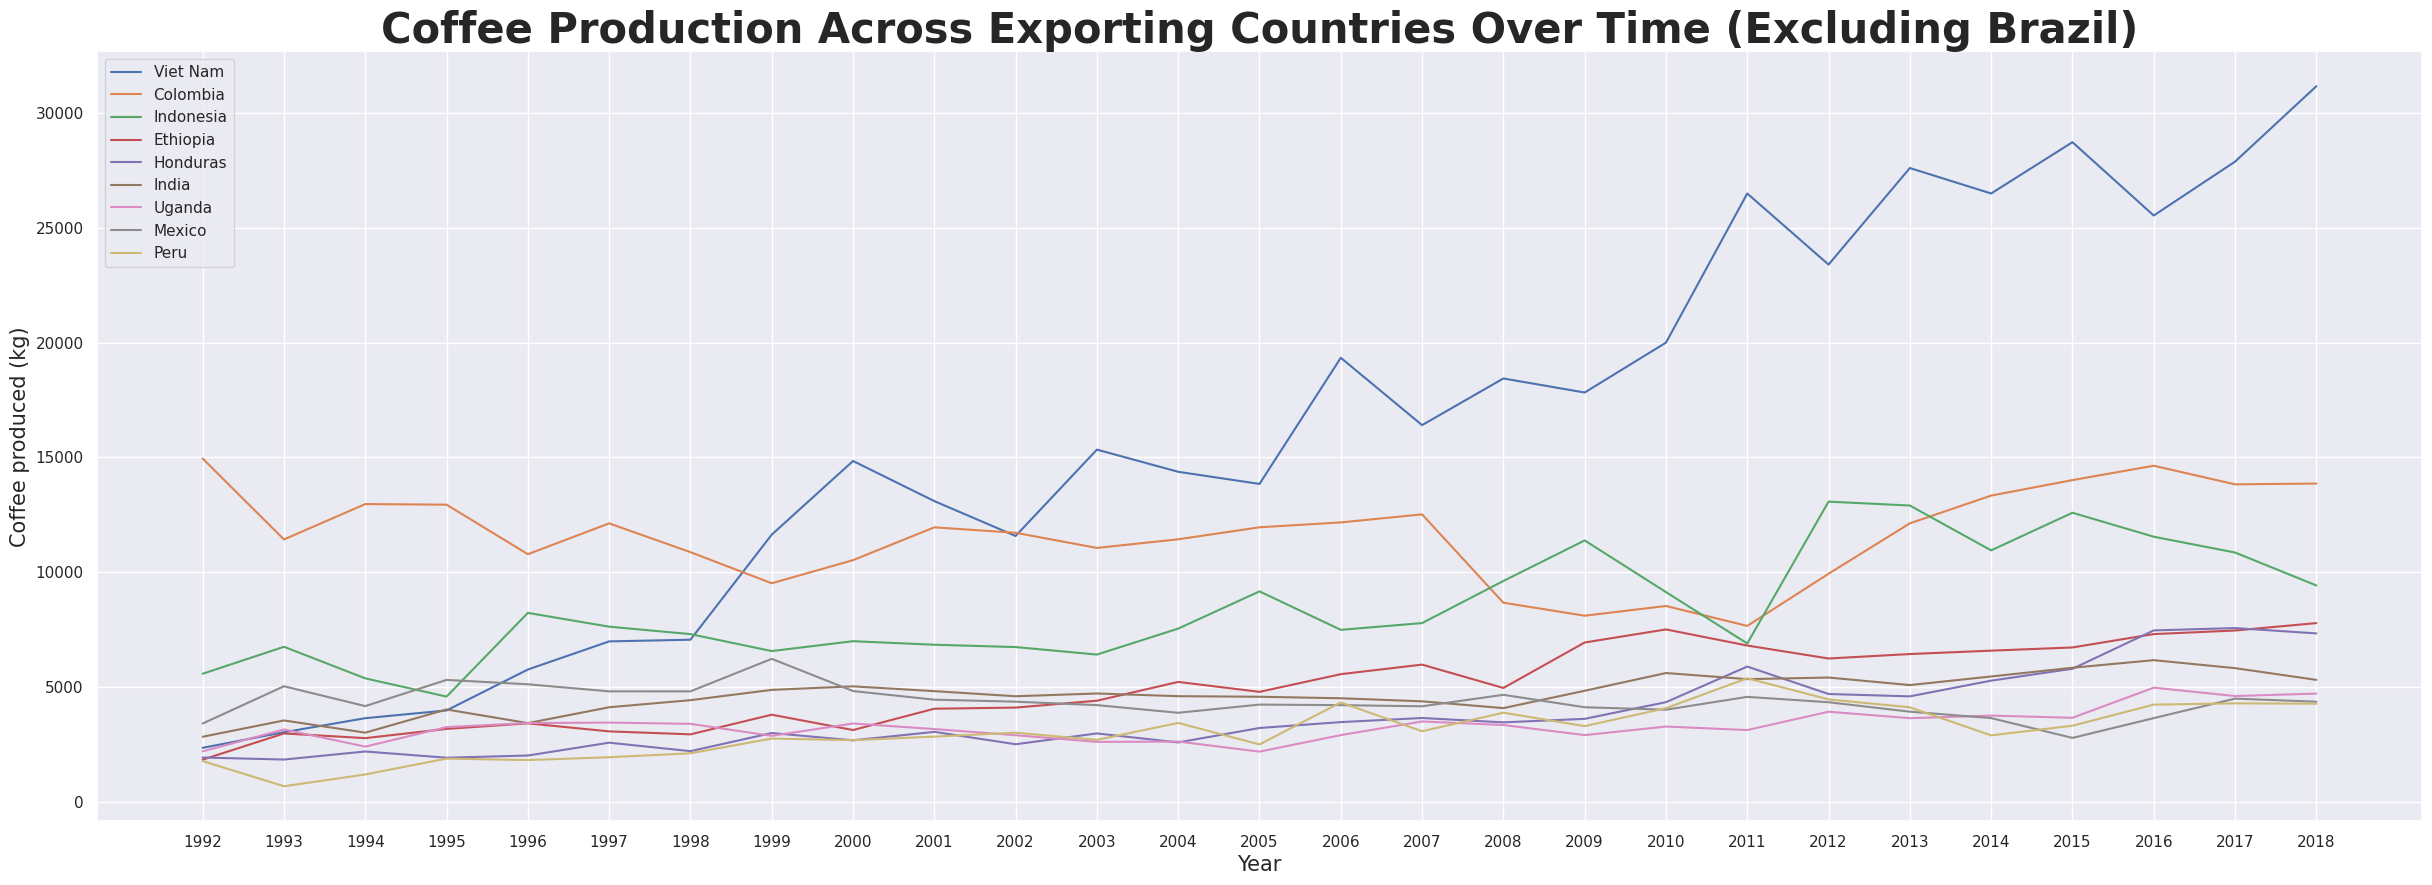

In [20]:
# (dc = domestic-consumption.csv)
#sort by consumption in 2018
tp = tp.sort_values(by='2018', ascending=False)
tp = tp.reset_index(drop=True)
top_ten_prod = tp.head(10)

#Transpose the data frame
pivot2 = top_ten_prod.transpose()

#rename columns to row 1
pivot2.columns = pivot2.iloc[0]

#drop first two rows
pivot2 = pivot2.iloc[3:]

#rename index
pivot2.index.names = ['Year']

copy = pivot2.copy()

#Drop the outlier in the data (Brazil)
copy.drop('Brazil', axis=1, inplace=True) 

top_ten_produce_overtime = copy.copy()

sns.set(rc={"figure.figsize":(30, 10)}) 

produce_plot = sns.lineplot(data=top_ten_produce_overtime, dashes=False)
produce_plot.set_title("Coffee Production Across Exporting Countries Over Time (Excluding Brazil)", fontdict={'size': 30, 'weight': 'bold'})
produce_plot.set_xlabel('Year', fontdict={'size': 15})
produce_plot.set_ylabel('Coffee produced (kg)', fontdict={'size': 15})
produce_plot.legend()
plt.show()

## Examine Percent change in consumption

/tmp/ipykernel_85083/3511321252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_change['total_increase'] = dc_change['1990']/dc_change['2018']*100
/tmp/ipykernel_85083/3511321252.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_change["total_increase"].fillna(0, inplace = True)


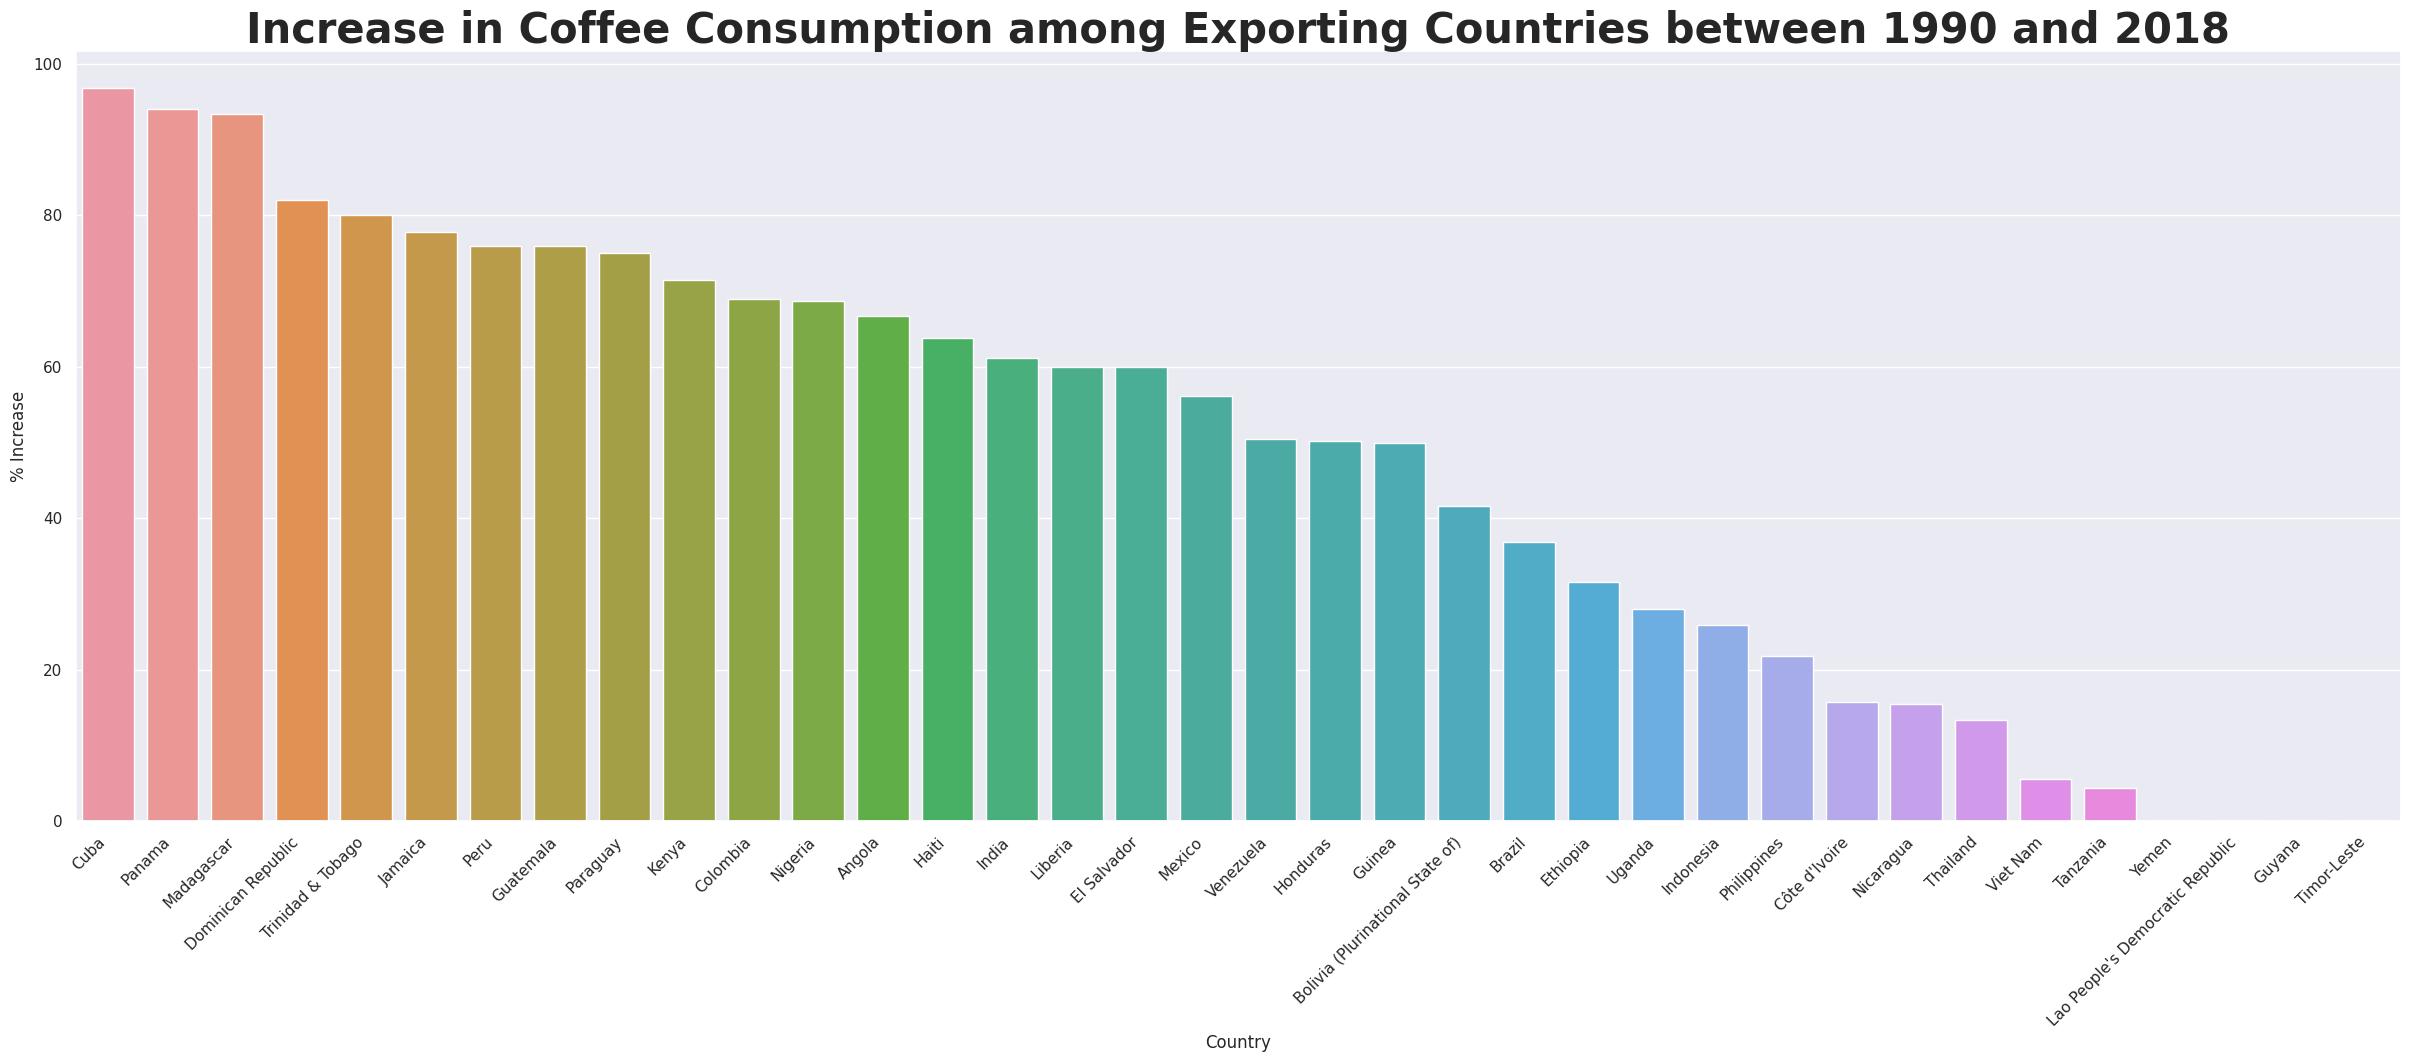

In [21]:
dc_change = dc[dc['1990'] < dc['2018']]
dc_change['total_increase'] = dc_change['1990']/dc_change['2018']*100
inf = dc_change['total_increase'] == np.inf
dc_change.loc[inf, 'total_increase'] = 0
dc_change["total_increase"].fillna(0, inplace = True)
#dc_change['total_increase'].round(decimals = 2)
dc_change = np.round(dc_change, decimals = 2)
dc_change = dc_change.sort_values(by='total_increase', ascending=False)
increase_consume_barplot = sns.barplot(x=dc_change['domestic_consumption'], y = dc_change['total_increase'])
increase_consume_barplot.set_ylabel('% Increase')
increase_consume_barplot.set_xlabel('Country')
increase_consume_barplot.set_title('Increase in Coffee Consumption among Exporting Countries between 1990 and 2018', fontdict={'size': 30, 'weight': 'bold'})
increase_consume_barplot.set_xticklabels(increase_consume_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
#plt.ylim(0,900)
plt.show()

/tmp/ipykernel_85083/1074522127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp_change['total_increase'] = tp_change['1990']/tp_change['2018']*100
/tmp/ipykernel_85083/1074522127.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp_change["total_increase"].fillna(0, inplace = True)


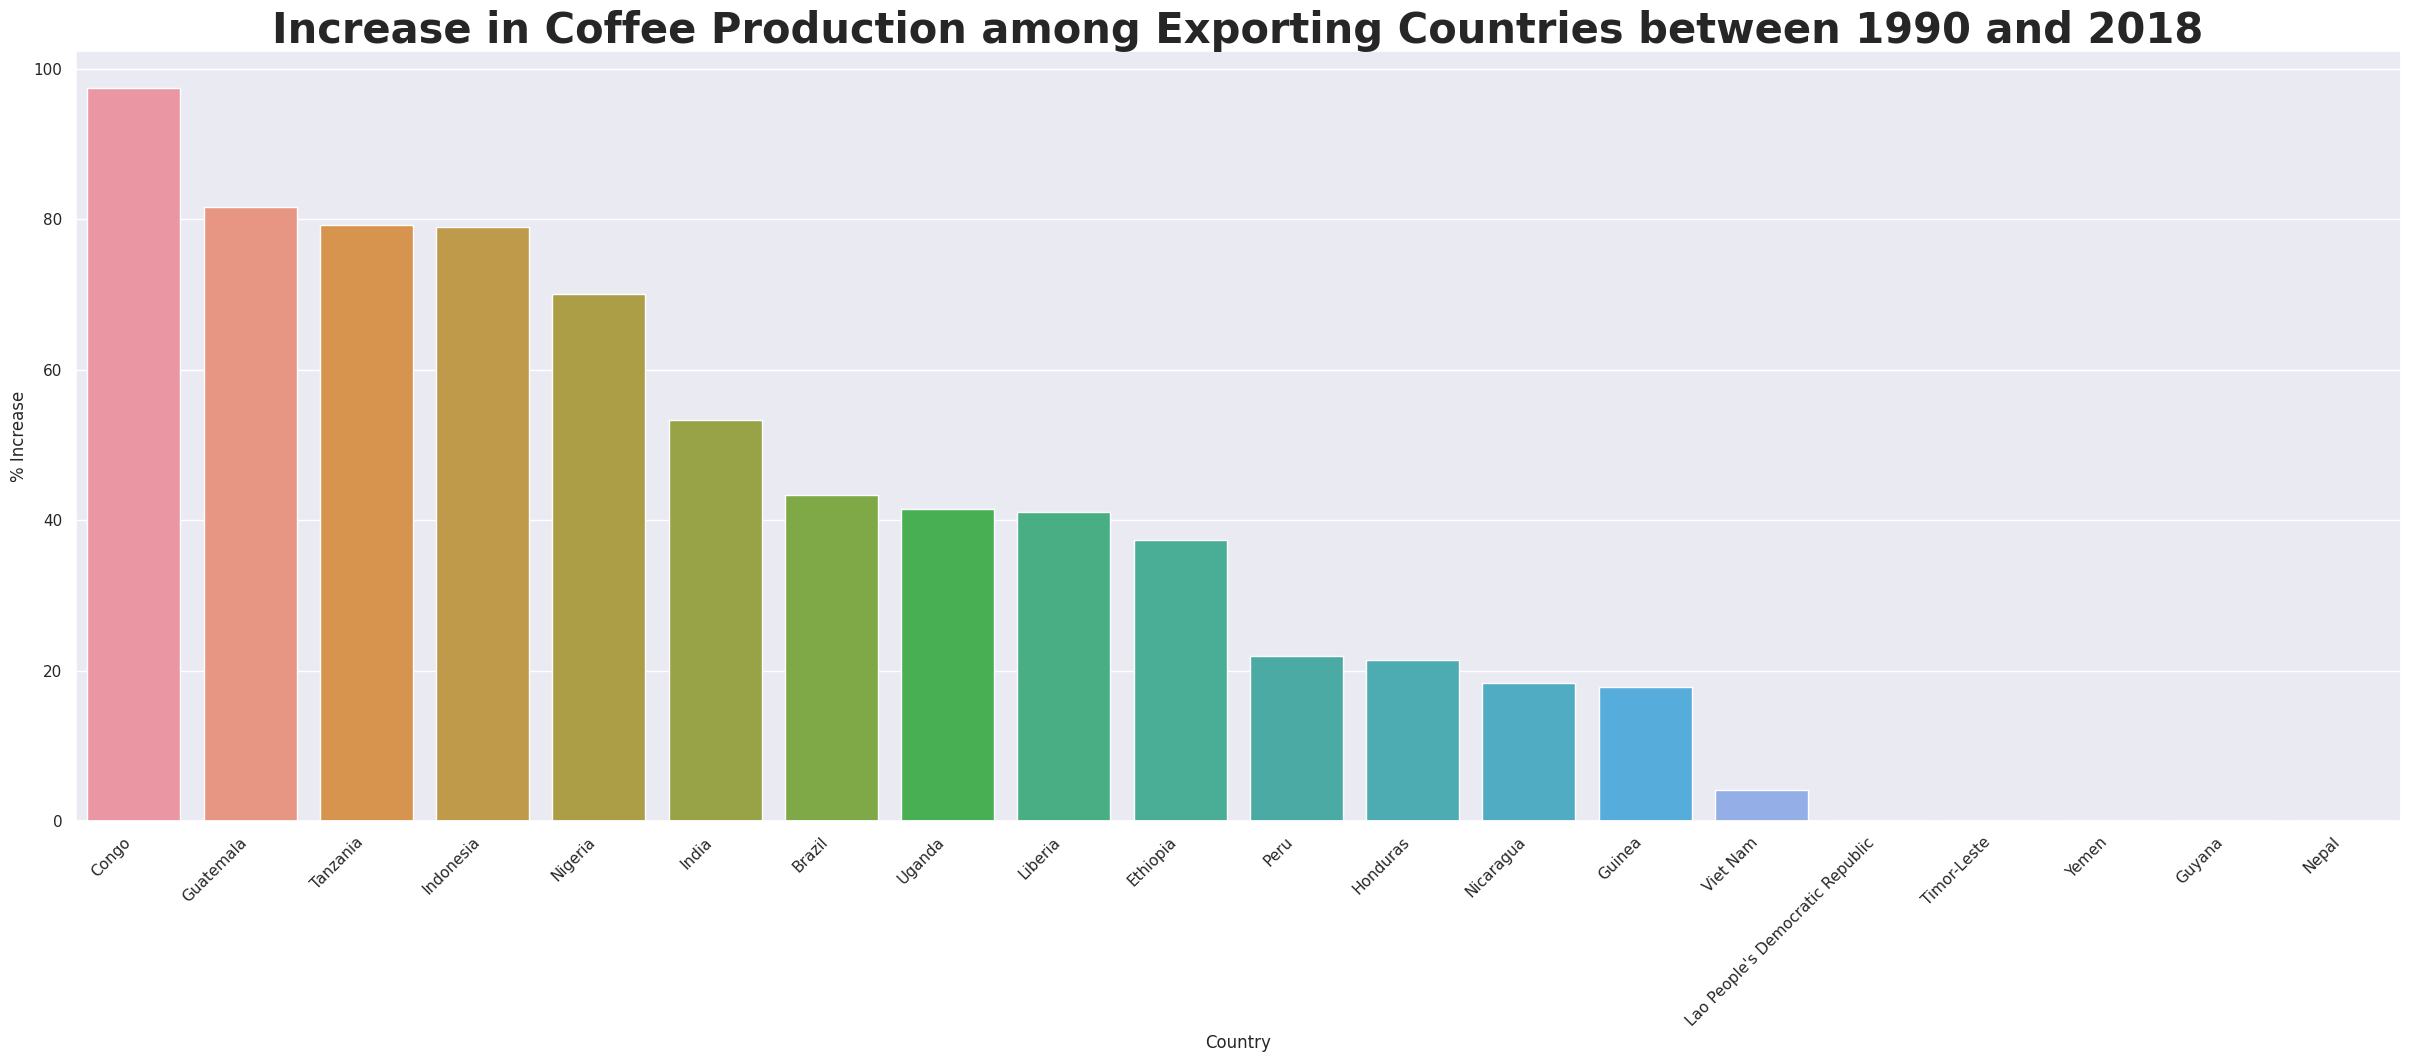

In [22]:
tp_change = tp[tp['1990'] < tp['2018']]
tp_change['total_increase'] = tp_change['1990']/tp_change['2018']*100
inf = tp_change['total_increase'] == np.inf
tp_change.loc[inf, 'total_increase'] = 0
tp_change["total_increase"].fillna(0, inplace = True)
tp_change = np.round(tp_change, decimals = 2)
tp_change = tp_change.sort_values(by='total_increase', ascending=False)
increase_produce_barplot = sns.barplot(x=tp_change['total_production'], y = tp_change['total_increase'])
increase_produce_barplot.set_ylabel('% Increase')
increase_produce_barplot.set_xlabel('Country')
increase_produce_barplot.set_title('Increase in Coffee Production among Exporting Countries between 1990 and 2018', fontdict={'size': 30, 'weight': 'bold'})
increase_produce_barplot.set_xticklabels(increase_produce_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
#plt.ylim(0,900)
plt.show()

## Analyze Brazil

In [23]:
#Reset pivot and create Brazil coffee consumption dataframe
pivot.drop(pivot.columns.difference(['Brazil']), 1, inplace=True)
Brazil_consume = pivot.copy()
Brazil_consume.rename(columns={'Brazil': 'consumption'}, inplace=True)

#Create another Brazil dataframe from the production data (tp = total-production.csv)
pivot2 = tp.transpose()
pivot2.columns = pivot2.iloc[0]
pivot2 = pivot2.drop('total_production')
pivot2.index.names = ['Year']
pivot2.drop(pivot2.columns.difference(['Brazil']), 1, inplace=True)
Brazil_prod = pivot2.copy()
Brazil_prod.rename(columns={'Brazil': 'production'}, inplace=True)
Brazil_prod.head()

#Combine the two
Brazil = pd.concat([Brazil_prod, Brazil_consume], axis=1)
Brazil.head(10)

/tmp/ipykernel_85083/1841956070.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  pivot.drop(pivot.columns.difference(['Brazil']), 1, inplace=True)
/tmp/ipykernel_85083/1841956070.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  pivot2.drop(pivot2.columns.difference(['Brazil']), 1, inplace=True)


production consumption
Year                        
1990  27285.6286         NaN
1991  27293.4934         NaN
1992  34603.3542      8900.0
1993  28166.9786      9100.0
1994   28192.047      9300.0
1995  18060.2022     10100.0
1996   29196.743     11000.0
1997   26148.004     11500.0
1998  36760.8533     12200.0
1999  47577.8065     12700.0

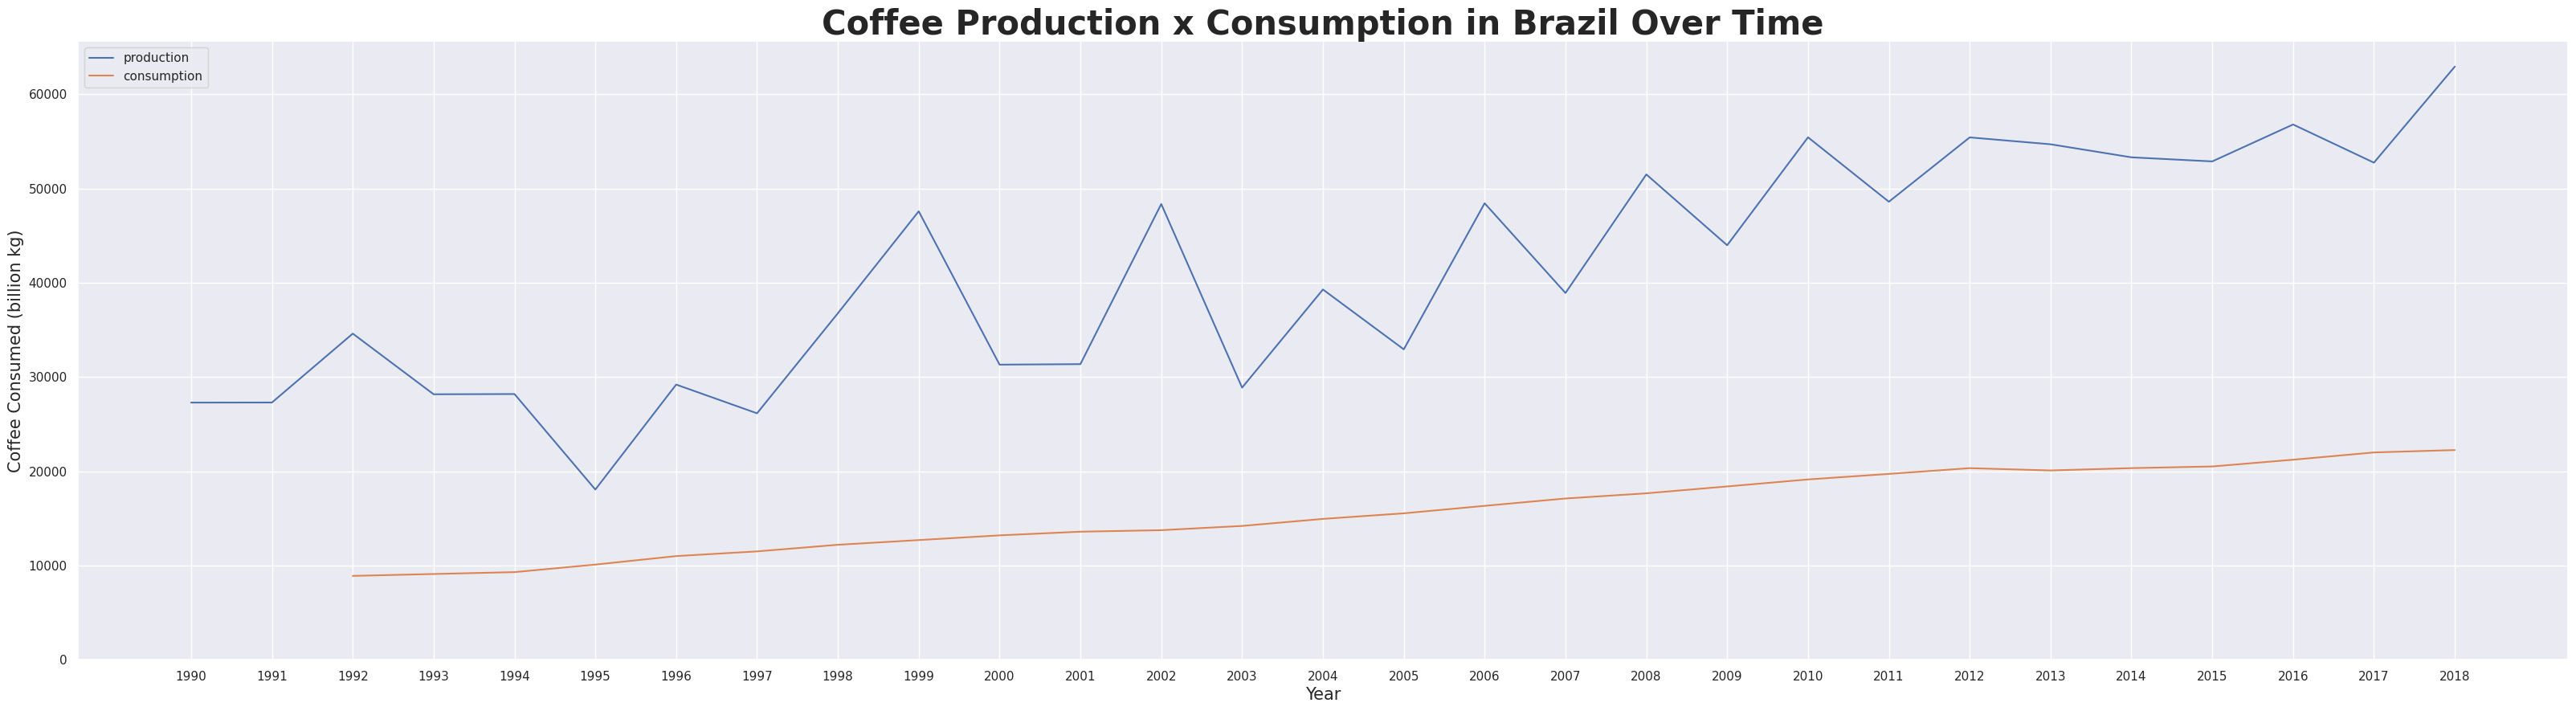

In [24]:
#Create line graph of Brazilian coffee consumption and production over time.
sns.set(rc={"figure.figsize":(40, 10)})
brazil_consumption = sns.lineplot(data=Brazil, dashes=False)
brazil_consumption.set_title('Coffee Production x Consumption in Brazil Over Time', fontdict={'size': 30, 'weight': 'bold'})
brazil_consumption.set_xlabel('Year', fontdict={'size': 15})
brazil_consumption.set_ylabel('Coffee Consumed (billion kg)', fontdict={'size': 15})
plt.ylim(0)
plt.show()

## Examine Retail Prices vs Pay to Growers

In [25]:
#sort by retail price in 2018 (rp = retail-prices.csv)
rp = rp.sort_values(by='2018', ascending=False)
rp = rp.reset_index(drop=True)
rp.head()

retail_prices       1990       1991       1992       1993       1994  \
0  United Kingdom  23.289183  22.980132  22.273731  18.631347  25.077263   
1           Italy  11.721854  12.406181  12.935982  10.132450  10.331126   
2         Austria  10.816777  10.088300  11.015453  10.971302  10.110375   
3           Japan  22.649007  26.225166  27.858720  32.163355  32.428256   
4          Cyprus   6.247241   6.181015   6.335541   5.739514   7.019868   

        1995       1996       1997       1998  ...       2009       2010  \
0  30.441501  29.470199  32.891832  34.039735  ...  35.298013  34.657837   
1  12.582781  13.068433  12.030905  12.207506  ...  16.953642  16.203091   
2  11.434879  11.964680   9.646799   8.763797  ...  15.342163  14.768212   
3  39.116998  33.642384  31.390728  29.845475  ...  13.399558  14.105960   
4   9.403974   9.116998   8.918322  10.176600  ...  12.207506  11.501104   

        2011       2012       2013       2014       2015       2016  \
0  41.986755  42.384106  41.766004  45.386313  41.743929  35.960265   
1  18.807947  18.741722  19.845475  19.536424  16.512141  16.445916   
2  18.366446  18.498896  19.028698  19.050773  16.423841  12.450331   
3  16.225166  16.710817  13.355408  12.538631  12.362031  13.708609   
4  13.377483  14.039735  14.282561  14.304636  11.699779  11.699779   

        2017       2018  
0  37.549669  40.618102  
1  16.931567  17.924945  
2  13.730684  14.635762  
3  13.134658  12.803532  
4  12.141280  12.781457  

[5 rows x 30 columns]

/tmp/ipykernel_85083/2299085409.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pivot['average'] = rp.mean()


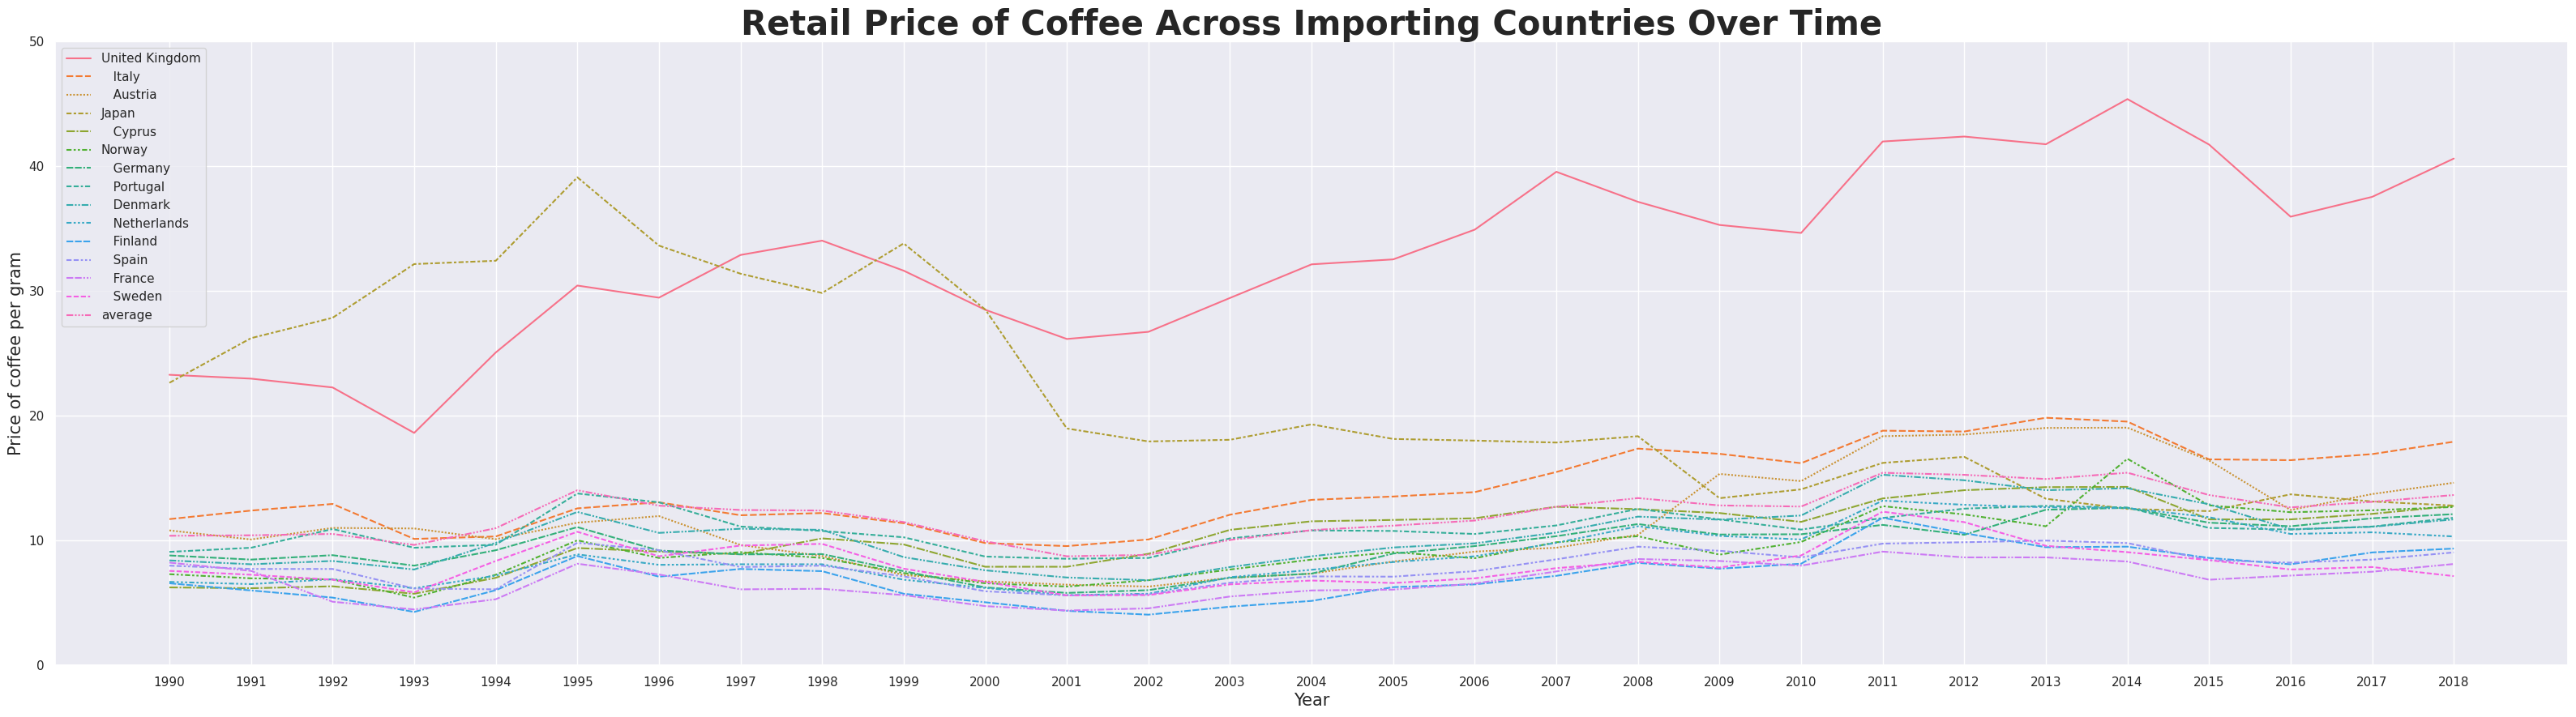

In [26]:
#Clean data and plot retail prices on line graph
pivot = rp.transpose()
pivot.columns = pivot.iloc[0]
pivot = pivot.iloc[1:]
pivot.index.names = ['Year']
pivot['Years'] = pivot.index
pivot['average'] = rp.mean()
retail_prices = sns.lineplot(data=pivot)
retail_prices.set_title('Retail Price of Coffee Across Importing Countries Over Time', fontdict={'size': 30, 'weight': 'bold'})
retail_prices.set_xlabel('Year', fontdict={'size': 15})
retail_prices.set_ylabel('Price of coffee per gram', fontdict={'size': 15})
retail_prices.legend()
plt.ylim(0, 50)
plt.show()

/tmp/ipykernel_85083/2366707130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['total_increase'] = retail['1990']/retail['2018']*100
/tmp/ipykernel_85083/2366707130.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail["total_increase"].fillna(0, inplace = True)


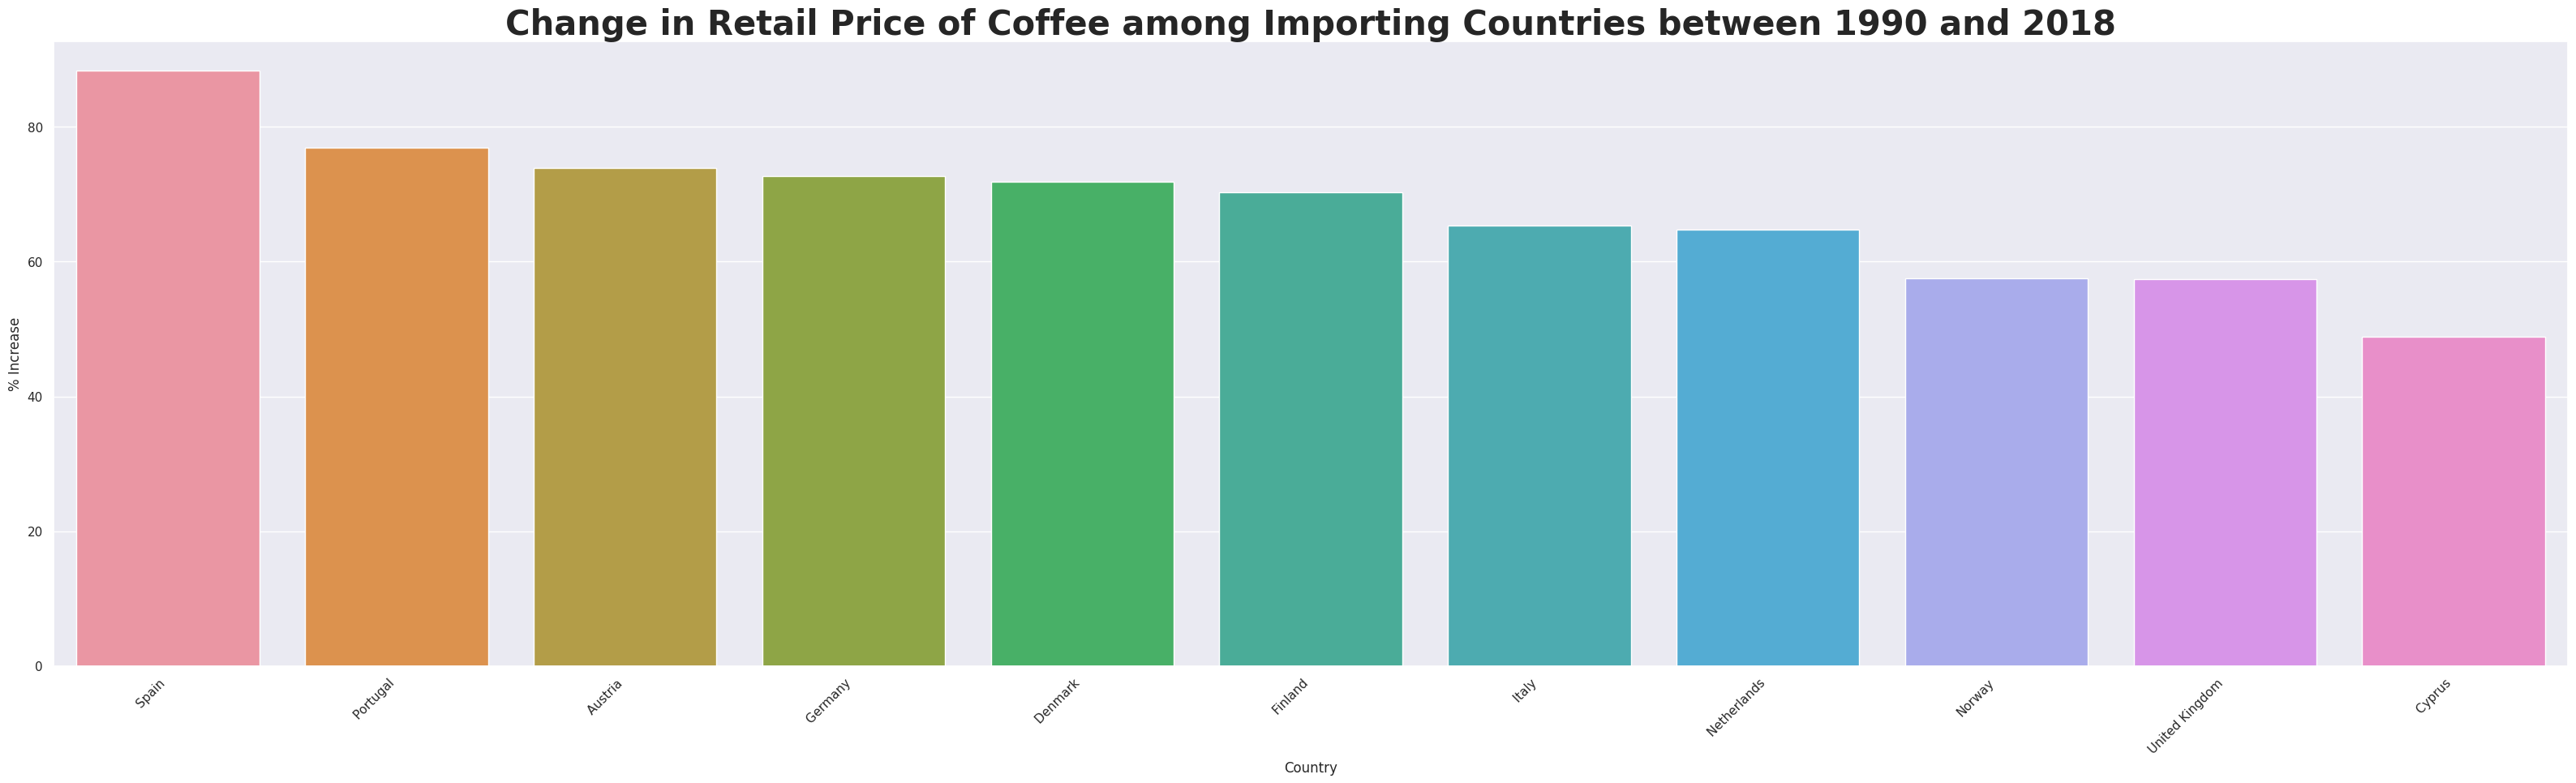

In [27]:
retail = rp[rp['1990'] < rp['2018']]
retail['total_increase'] = retail['1990']/retail['2018']*100
inf = retail['total_increase'] == np.inf
retail.loc[inf, 'total_increase'] = 0
retail["total_increase"].fillna(0, inplace = True)
retail = np.round(retail, decimals = 2)
retail = retail.sort_values(by='total_increase', ascending=False)
increase_rp_barplot = sns.barplot(x=retail['retail_prices'], y = retail['total_increase'])
increase_rp_barplot.set_ylabel('% Increase')
increase_rp_barplot.set_xlabel('Country')
increase_rp_barplot.set_title('Change in Retail Price of Coffee among Importing Countries between 1990 and 2018', fontdict={'size': 30, 'weight': 'bold'})
increase_rp_barplot.set_xticklabels(increase_rp_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

/tmp/ipykernel_85083/461593401.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pivot2['average'] = pptg.mean()


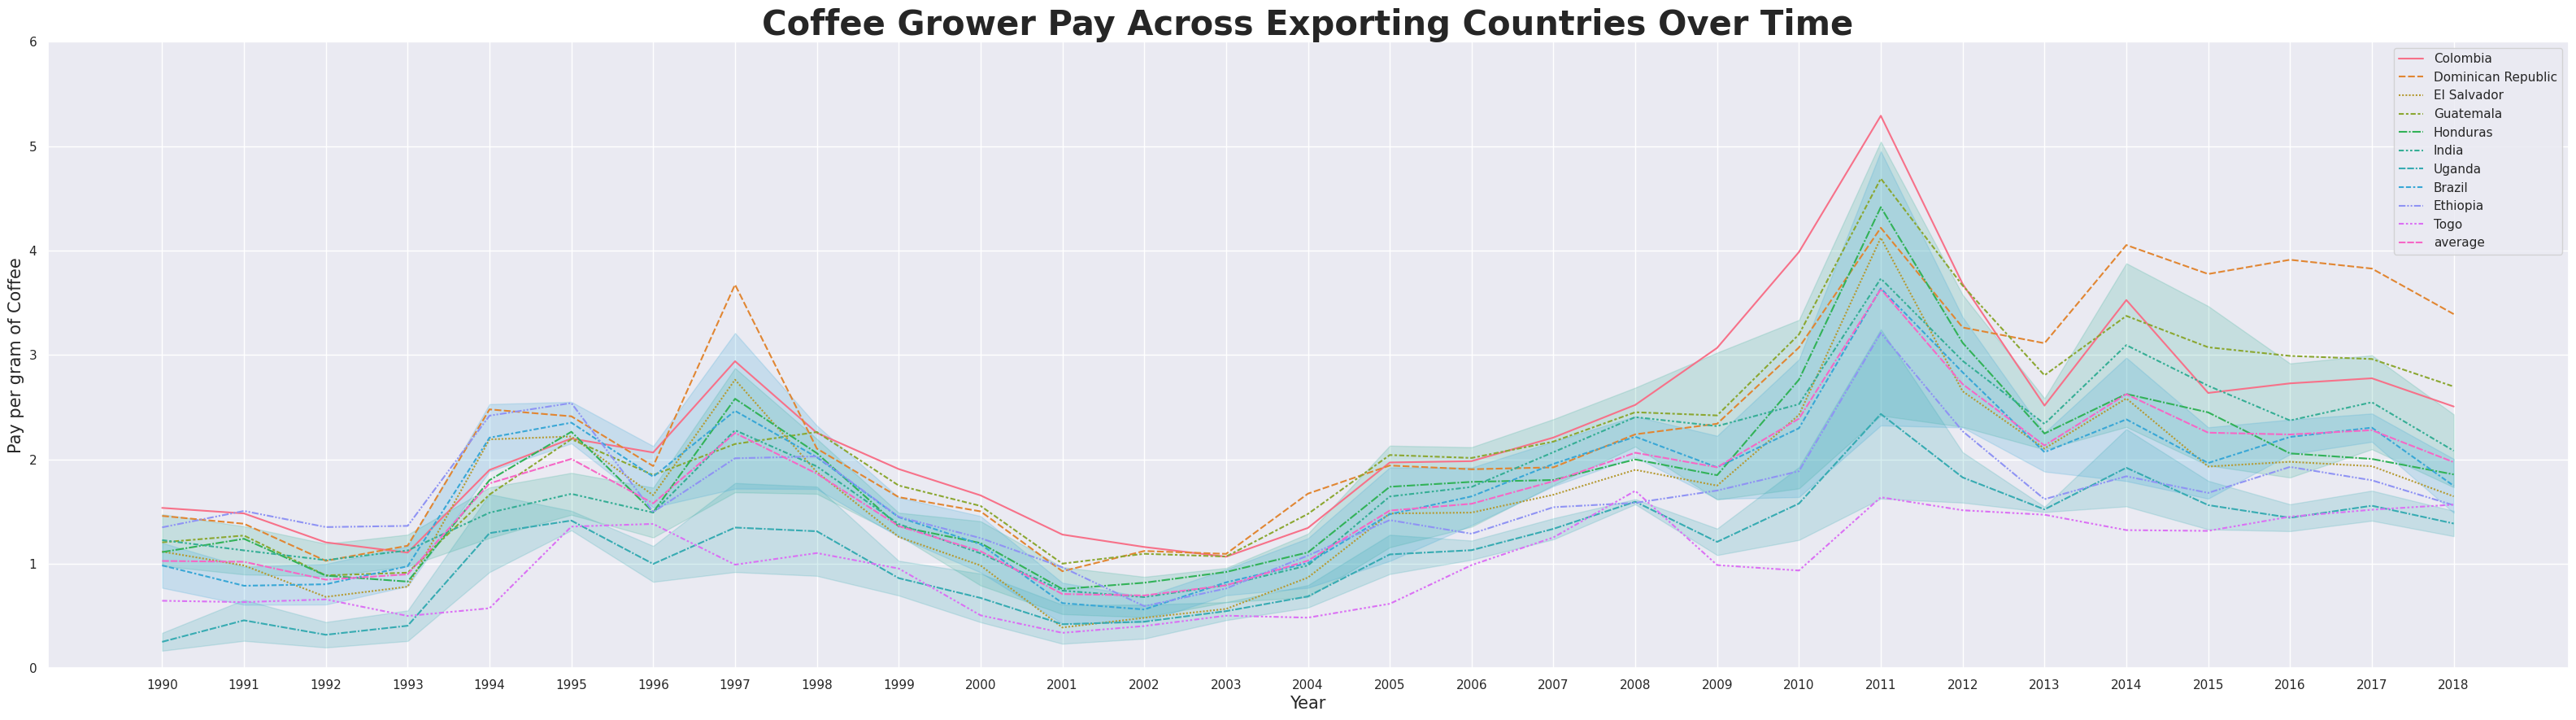

In [28]:
pivot2 = pptg.transpose()
pivot2.columns = pivot2.iloc[0]
pivot2 = pivot2.iloc[1:]
pivot2.index.names = ['Year']
pivot2['Years'] = pivot2.index
pivot2['average'] = pptg.mean()
grower_pay = sns.lineplot(data=pivot2)
grower_pay.set_title('Coffee Grower Pay Across Exporting Countries Over Time', fontdict={'size': 30, 'weight': 'bold'})
grower_pay.set_xlabel('Year', fontdict={'size': 15})
grower_pay.set_ylabel('Pay per gram of Coffee', fontdict={'size': 15})
grower_pay.legend()
plt.ylim(0, 6)
plt.show()

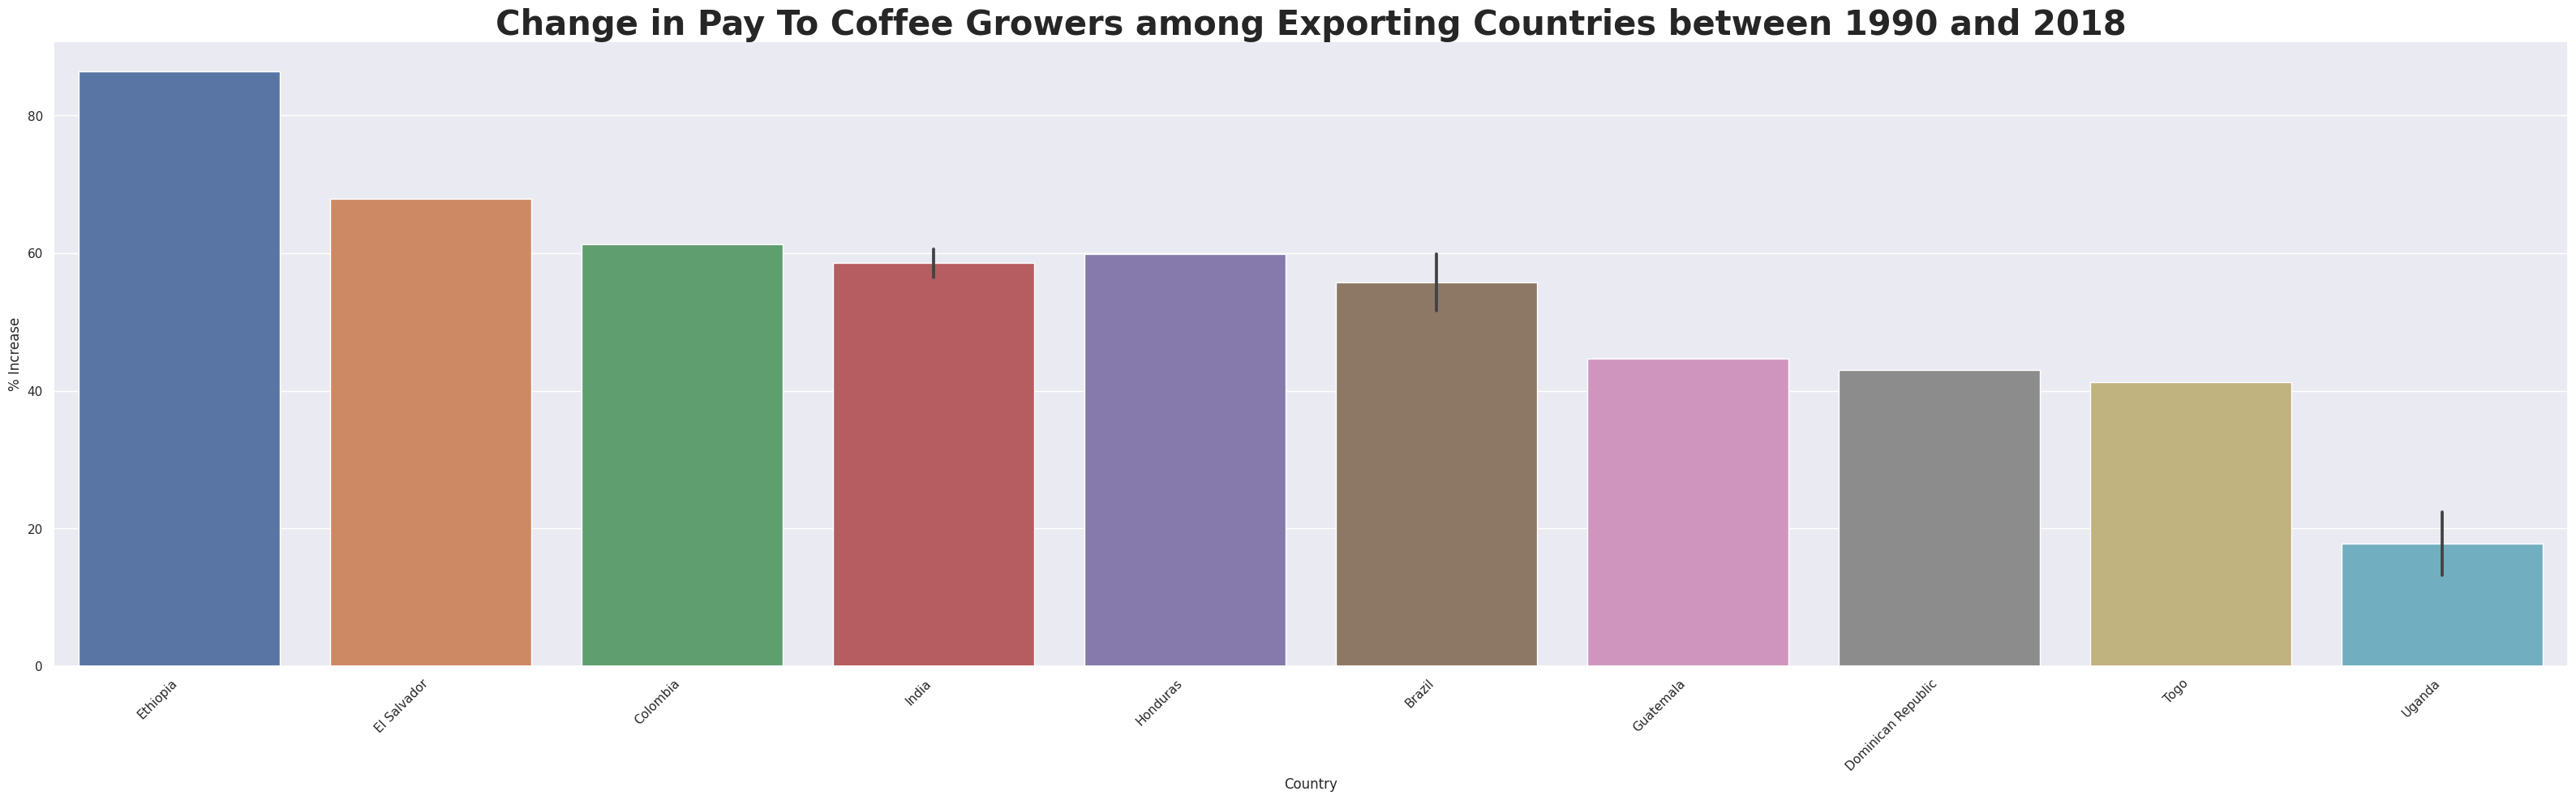

In [29]:
pay_to_grow = pptg[pptg['1990'] < pptg['2018']]
pay_to_grow['total_increase'] = pay_to_grow['1990']/pay_to_grow['2018']*100
inf = pay_to_grow['total_increase'] == np.inf
pay_to_grow.loc[inf, 'total_increase'] = 0
pay_to_grow["total_increase"].fillna(0, inplace = True)
pay_to_grow = np.round(pay_to_grow, decimals = 2)
pay_to_grow = pay_to_grow.sort_values(by='total_increase', ascending=False)
increase_pptg_barplot = sns.barplot(x=pay_to_grow['prices_paid_to_growers'], y = pay_to_grow['total_increase'])
increase_pptg_barplot.set_ylabel('% Increase')
increase_pptg_barplot.set_xlabel('Country')
increase_pptg_barplot.set_title('Change in Pay To Coffee Growers among Exporting Countries between 1990 and 2018', fontdict={'size': 30, 'weight': 'bold'})
increase_pptg_barplot.set_xticklabels(increase_pptg_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [30]:
#Combine average price to average pay over time
pivot.drop(pivot.columns.difference(['average']), 1, inplace=True)
avg_price = pivot.copy()
avg_price.rename(columns={'average': 'avg_price'}, inplace=True)

pivot2.drop(pivot2.columns.difference(['average']), 1, inplace=True)
avg_pay = pivot2.copy()
avg_pay.rename(columns={'average': 'avg_pay'}, inplace=True)

#Combine the two
compare_price_pay = pd.concat([avg_price, avg_pay], axis=1)
compare_price_pay = pd.DataFrame(compare_price_pay)
compare_price_pay.tail()

/tmp/ipykernel_85083/4150924749.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  pivot.drop(pivot.columns.difference(['average']), 1, inplace=True)
/tmp/ipykernel_85083/4150924749.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  pivot2.drop(pivot2.columns.difference(['average']), 1, inplace=True)


avg_price   avg_pay
Year                     
2014  15.439924  2.623876
2015  13.653422  2.255341
2016  12.658467  2.238045
2017  13.107852  2.279210
2018  13.651845  1.972795

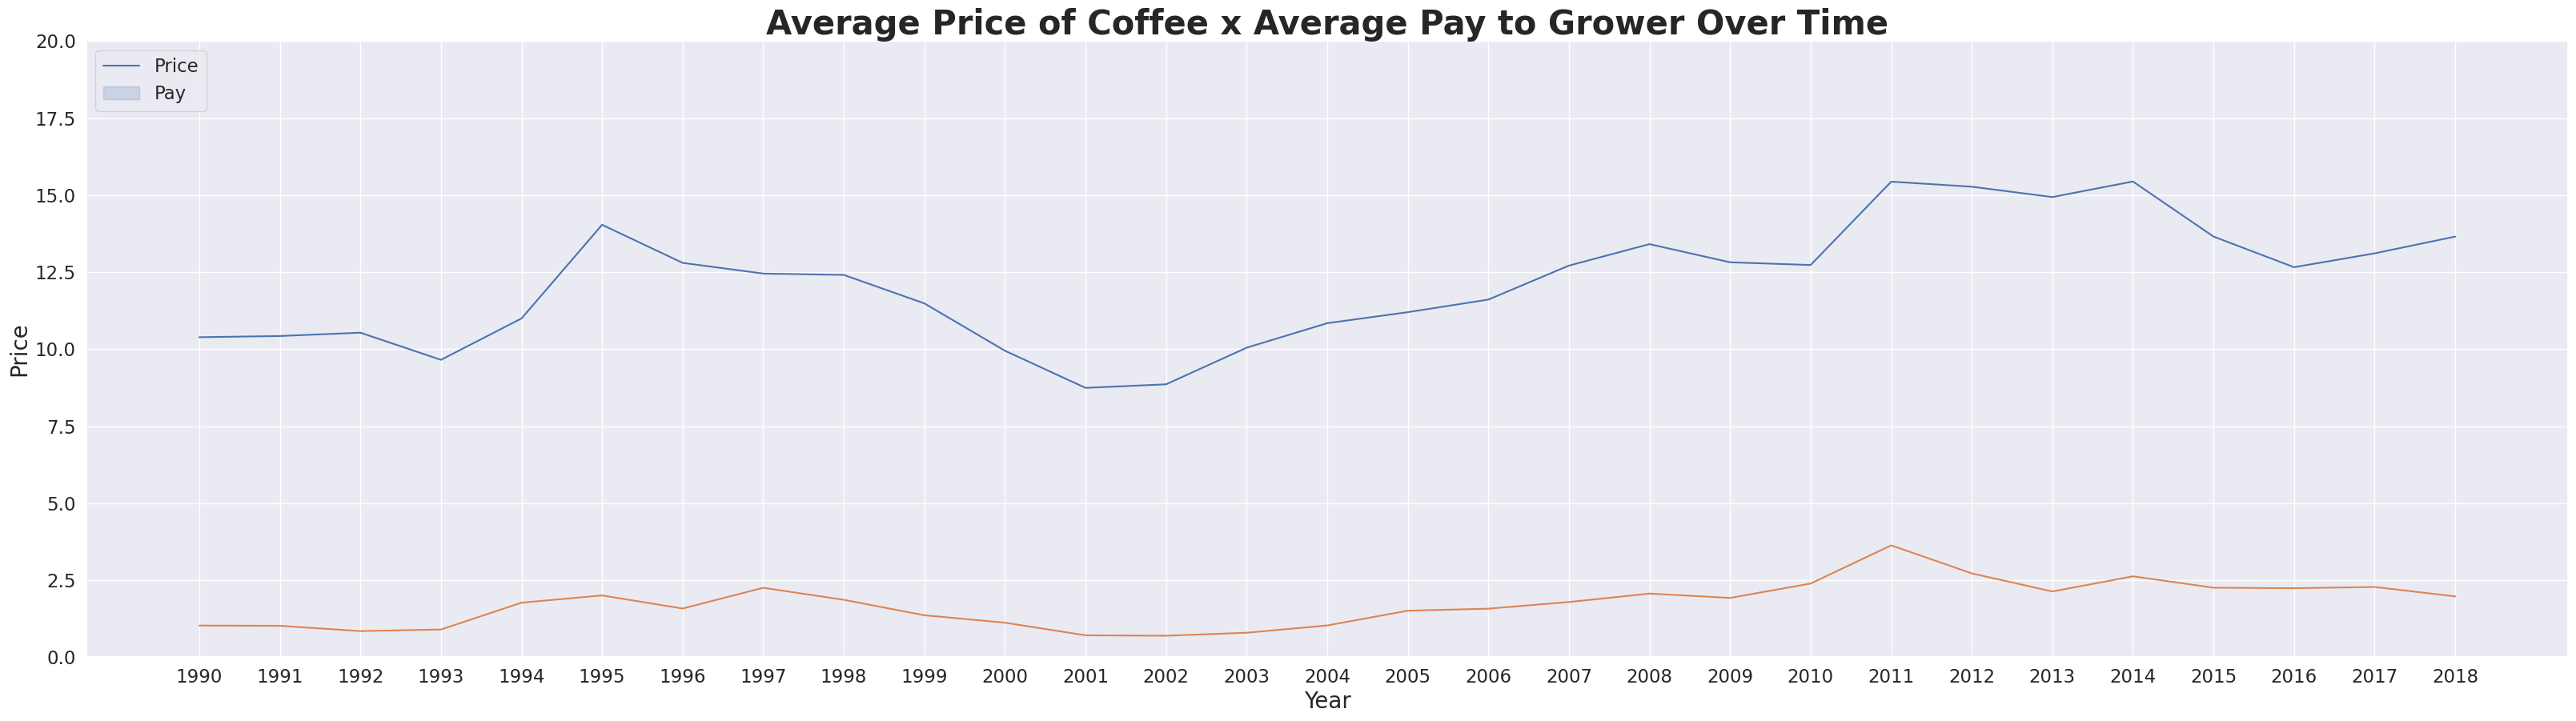

In [31]:
#Plot the two
sns.set(font_scale=1.5)
price_pay_plot = sns.lineplot(data=compare_price_pay, dashes=False)
price_pay_plot.set_title('Average Price of Coffee x Average Pay to Grower Over Time', fontdict={'size': 30, 'weight': 'bold'})
price_pay_plot.set_xlabel('Year', fontdict={'size': 20})
price_pay_plot.set_ylabel('Price', fontdict={'size': 20})
plt.legend(loc='upper left', labels=['Price', 'Pay'])
plt.ylim(0,20)
plt.show()

# Coffee Characteristics

In [32]:
# clean data (cc = Coffee-characteristics.csv)
cc = cc[pd.to_numeric(cc['ID'], errors='coerce').notnull()]
cc.head()

ID                     Owner Country.of.Origin  \
0  1                 metad plc          Ethiopia   
1  2                 metad plc          Ethiopia   
2  3  grounds for health admin         Guatemala   
3  4       yidnekachew dabessa          Ethiopia   
4  5                 metad plc          Ethiopia   

                                 Company  \
0      metad agricultural developmet plc   
1      metad agricultural developmet plc   
2                                    NaN   
3  yidnekachew debessa coffee plantation   
4      metad agricultural developmet plc   

                                Producer Number.of.Bags Bag.Weight  \
0                              METAD PLC            300      60 kg   
1                              METAD PLC            300      60 kg   
2                                    NaN              5          1   
3  Yidnekachew Dabessa Coffee Plantation            320      60 kg   
4                              METAD PLC            300      60 kg   

                   In.Country.Partner Harvest.Year      Grading.Date  ...  \
0  METAD Agricultural Development plc         2014   April 4th, 2015  ...   
1  METAD Agricultural Development plc         2014   April 4th, 2015  ...   
2        Specialty Coffee Association          NaN    May 31st, 2010  ...   
3  METAD Agricultural Development plc         2014  March 26th, 2015  ...   
4  METAD Agricultural Development plc         2014   April 4th, 2015  ...   

  Category.One.Defects Quakers  Color Category.Two.Defects        Expiration  \
0                    0       0  Green                  0.0   April 3rd, 2016   
1                    0       0  Green                  1.0   April 3rd, 2016   
2                    0       0    NaN                  0.0    May 31st, 2011   
3                    0       0  Green                  2.0  March 25th, 2016   
4                    0       0  Green                  2.0   April 3rd, 2016   

                   Certification.Body unit_of_measurement  \
0  METAD Agricultural Development plc                   m   
1  METAD Agricultural Development plc                   m   
2        Specialty Coffee Association                   m   
3  METAD Agricultural Development plc                   m   
4  METAD Agricultural Development plc                   m   

   altitude_low_meters  altitude_high_meters  altitude_mean_meters  
0               1950.0                2200.0                2075.0  
1               1950.0                2200.0                2075.0  
2               1600.0                1800.0                1700.0  
3               1800.0                2200.0                2000.0  
4               1950.0                2200.0                2075.0  

[5 rows x 35 columns]

/tmp/ipykernel_85083/2219077466.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  countries.drop(countries.columns.difference(['Country.of.Origin']), 1, inplace=True)


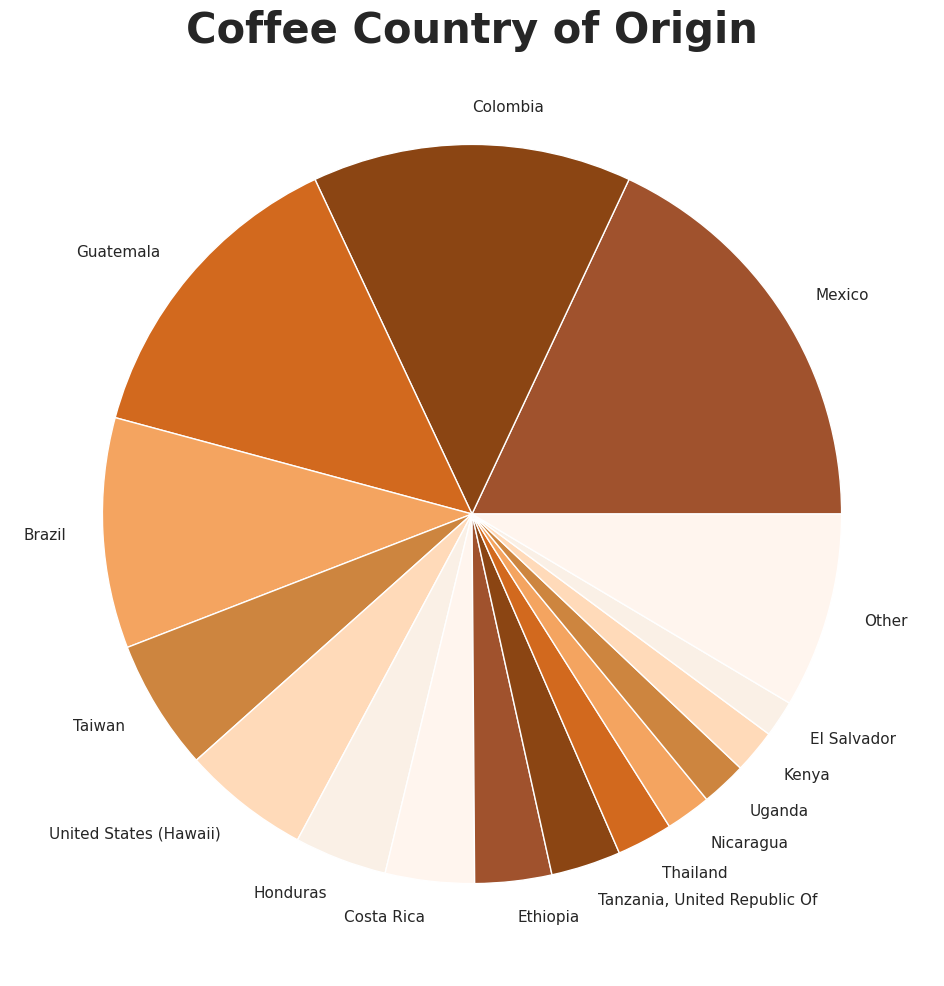

In [33]:
countries = cc.copy()
countries.drop(countries.columns.difference(['Country.of.Origin']), 1, inplace=True)
country_counts = countries.value_counts()
country_counts = pd.DataFrame(country_counts)
country_counts = country_counts.reset_index()
country_counts.columns=['Origin', 'Count']

#the top 5
country_counts2 = country_counts[:15].copy()

#others
new_row = pd.DataFrame(data = {
    'Origin' : ['Other'],
    'Count' : [country_counts['Count'][15:].sum()]
})

#combining top 5 with others
pie = pd.concat([country_counts2, new_row])

sns.set(rc={"figure.figsize":(40, 12)})

#define colors
colors = ['sienna', 'saddlebrown', 'chocolate', 'sandybrown', 'peru', 'peachpuff', 'linen', 'seashell']

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

pie_chart = pie.plot(kind = 'pie', y = 'Count', labels = pie['Origin'], colors=colors, autopct=autopct_format(pie))
pie_chart.set_title('Coffee Country of Origin', fontdict={'size': 30, 'weight': 'bold'})
plt.legend([],[], frameon=False)
plt.ylabel(None)
plt.show()

## Predict average production over next few years

## Pay

In [34]:
predict_pay = avg_pay.rename(columns={'avg_pay': 'ds'})
predict_pay['y'] = predict_pay.index
predict_pay.tail()

prices_paid_to_growers        ds     y
Year                                  
2014                    2.623876  2014
2015                    2.255341  2015
2016                    2.238045  2016
2017                    2.279210  2017
2018                    1.972795  2018

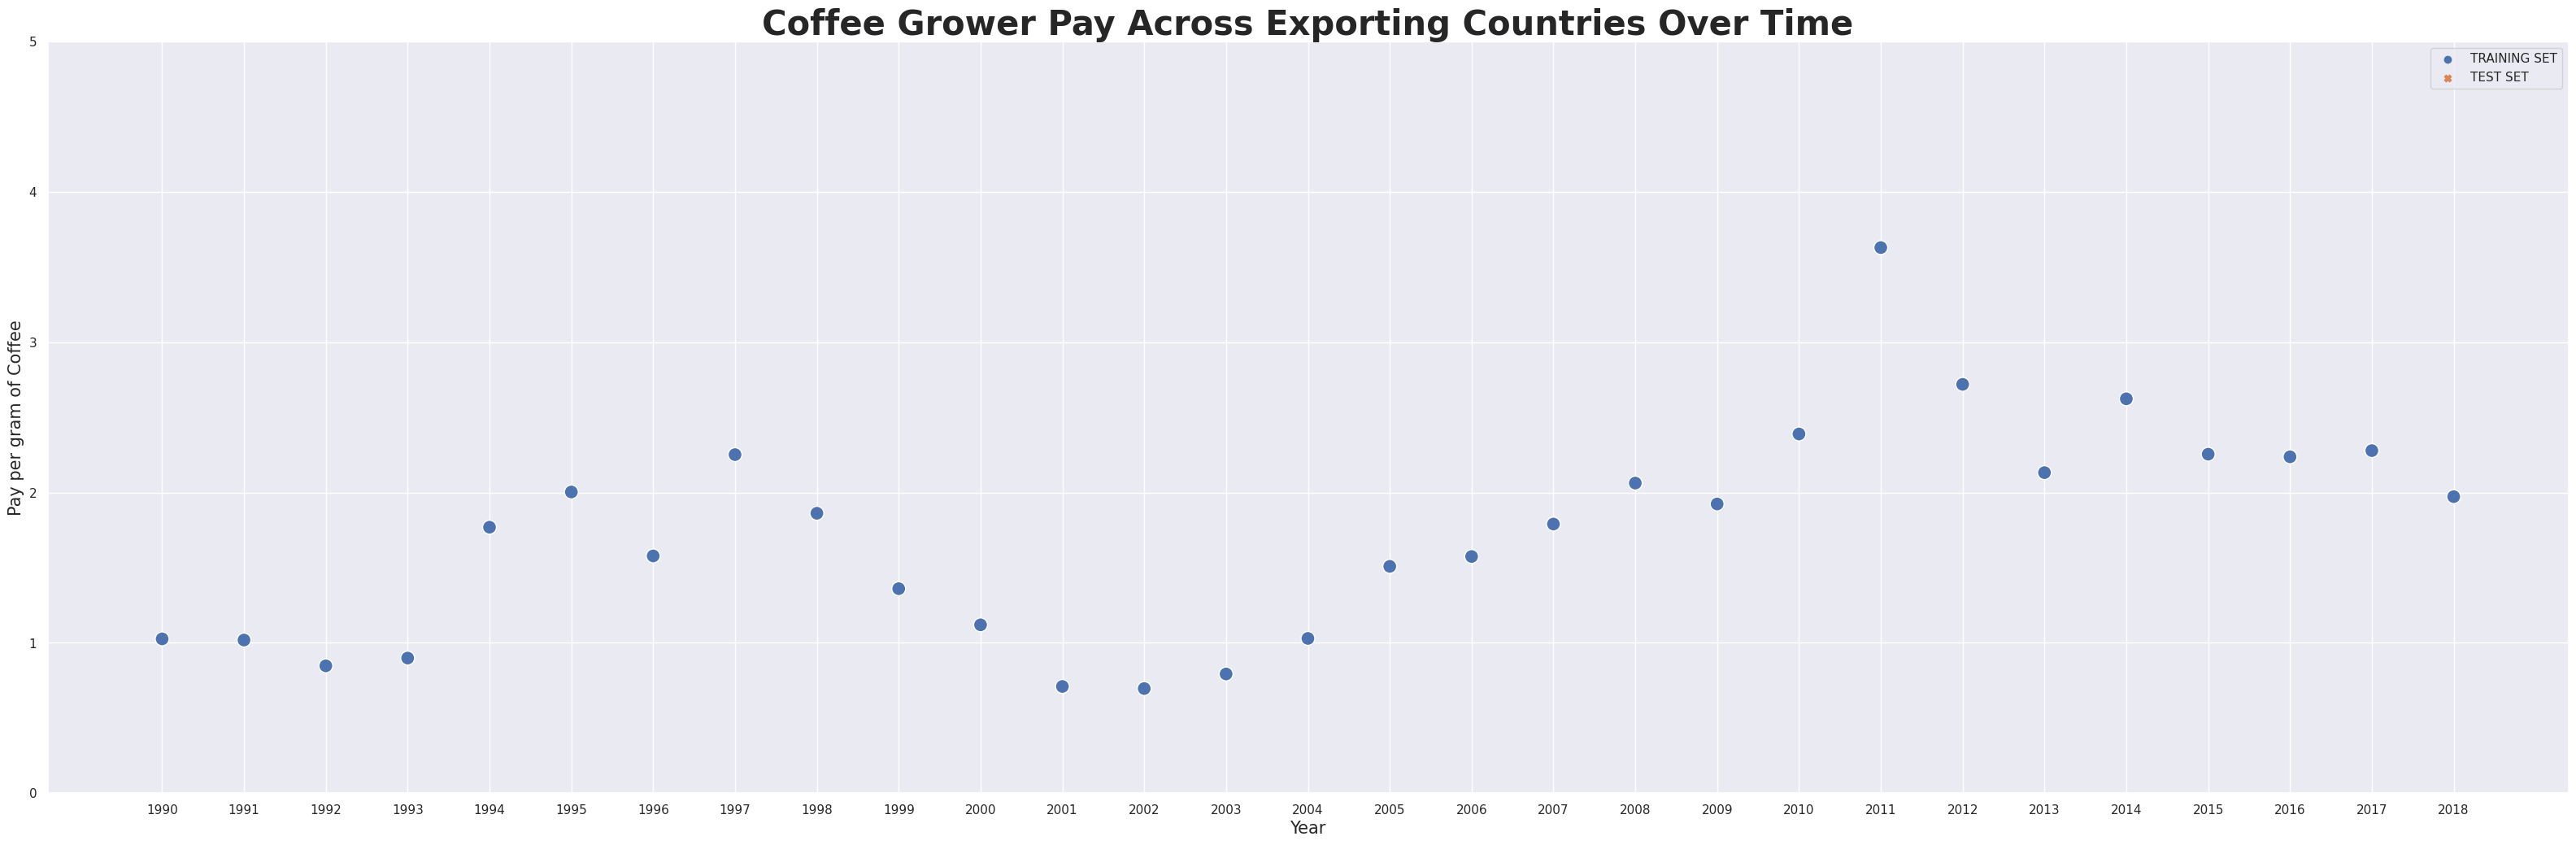

In [35]:
split_date = '2018'
pay_train = predict_pay.loc[predict_pay['y'] <= split_date].copy()
pay_test = predict_pay.loc[predict_pay['y'] > split_date].copy()

# Plot train and test so you can see where we have split
pay_test = pay_test.rename(columns={'ds': 'TEST SET'}) 
pay_train = pay_train.rename(columns={'ds': 'TRAINING SET'})
pay_set = pay_train.merge(pay_test, how = 'outer')
pay_set.index = pay_set['y']
#pay_set.plot(figsize=(10, 5), title='Avg Pay over time', style='.', ms=1)
pay_set_plot = sns.scatterplot(data=pay_set, s=150)
pay_set_plot.set_title('Coffee Grower Pay Across Exporting Countries Over Time', fontdict={'size': 30, 'weight': 'bold'})
plt.ylim(0, 5)
pay_set_plot.set_xlabel('Year', fontdict={'size': 15})
pay_set_plot.set_ylabel('Pay per gram of Coffee', fontdict={'size': 15})
pay_set_plot.legend()
#plt.xlim(1990, 2018)
plt.show()

In [36]:
# Format data for prophet model using ds and y
pay_train_prophet = pay_train.reset_index() \
    .rename(columns={'y':'ds',
                     'TRAINING SET':'y'})

pay_train_prophet.head()

prices_paid_to_growers  Year         y    ds
0                       1990  1.026493  1990
1                       1991  1.018779  1991
2                       1992  0.847206  1992
3                       1993  0.898745  1993
4                       1994  1.769350  1994

In [37]:
%%time
model = Prophet()
model.fit(pay_train_prophet)

16:47:34 - cmdstanpy - INFO - Chain [1] start processing
16:47:34 - cmdstanpy - INFO - Chain [1] done processing


CPU times: user 167 ms, sys: 16.7 ms, total: 184 ms
Wall time: 368 ms


In [38]:
#Predict the future
future = model.make_future_dataframe(periods=20, freq='y', include_history=False)
forecast = model.predict(future)

Text(82.0, 0.5, 'Pay per gram of Coffee')

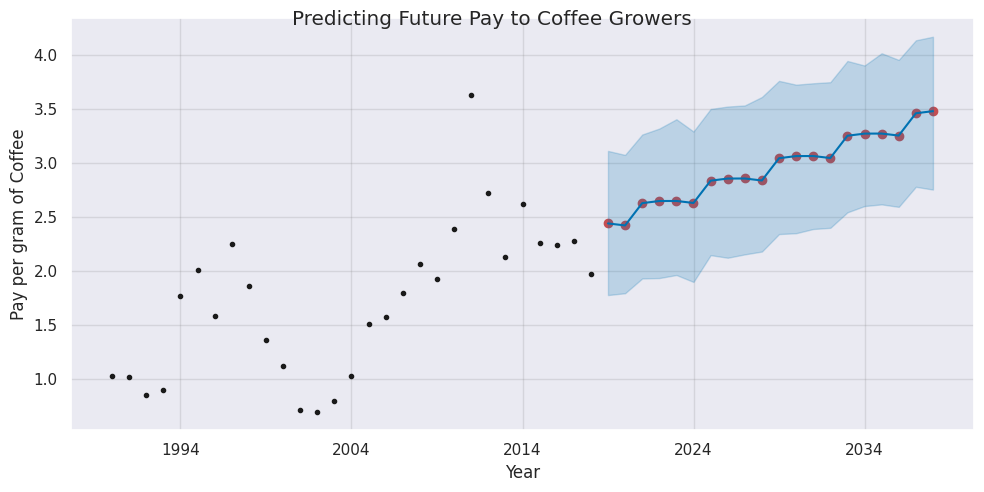

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(forecast['ds'], forecast['yhat'], color='r')
fig = model.plot(forecast, ax=ax)
#ax.set_ylim(0, 70000)
plot = plt.suptitle('Predicting Future Pay to Coffee Growers')
ax.set_xlabel("Year")
ax.set_ylabel("Pay per gram of Coffee")


## Price

In [40]:
predict_price = avg_price.rename(columns={'avg_price': 'ds'})
predict_price['y'] = predict_price.index
predict_price.tail()

retail_prices         ds     y
Year                          
2014           15.439924  2014
2015           13.653422  2015
2016           12.658467  2016
2017           13.107852  2017
2018           13.651845  2018

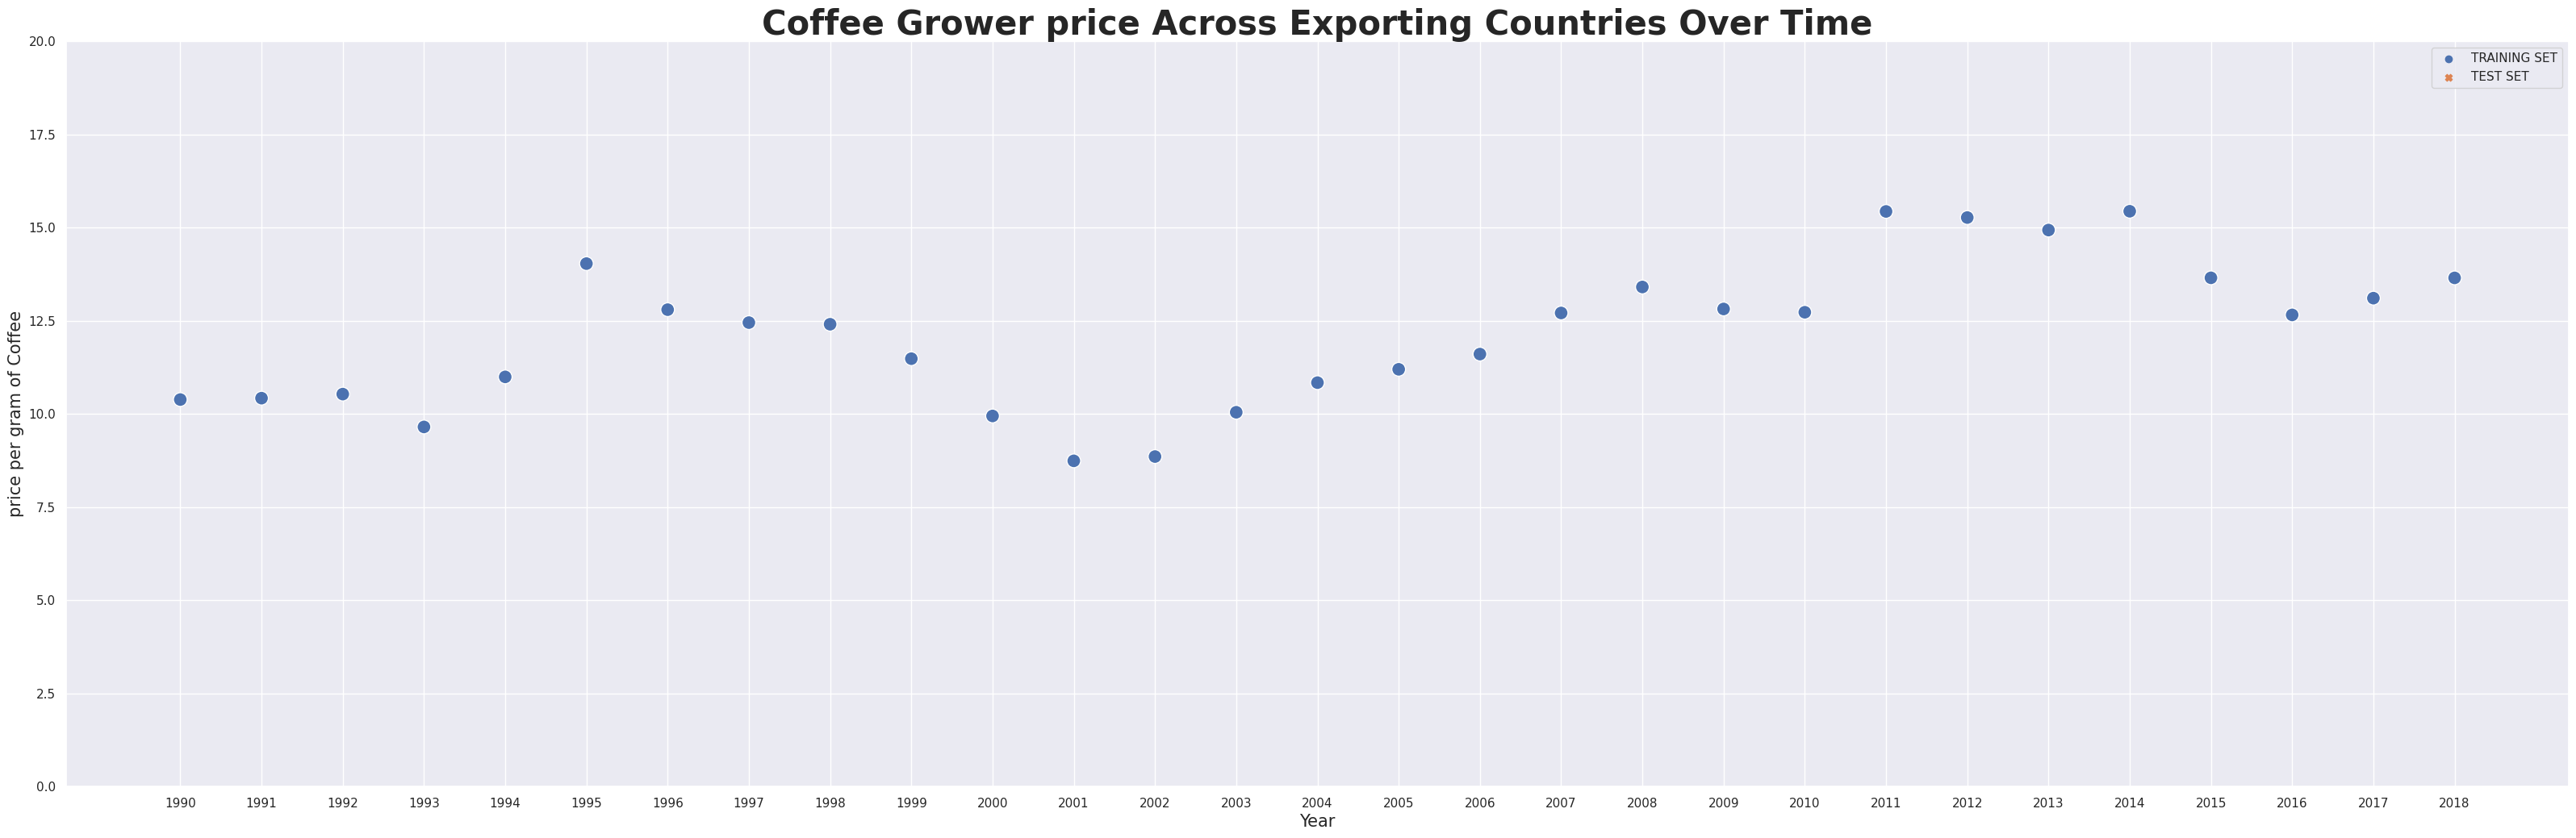

In [41]:
split_date = '2018'
price_train = predict_price.loc[predict_price['y'] <= split_date].copy()
price_test = predict_price.loc[predict_price['y'] > split_date].copy()

# Plot train and test so you can see where we have split
price_test = price_test.rename(columns={'ds': 'TEST SET'}) 
price_train = price_train.rename(columns={'ds': 'TRAINING SET'})
price_set = price_train.merge(price_test, how = 'outer')
price_set.index = price_set['y']
price_set_plot = sns.scatterplot(data=price_set, s=150)
price_set_plot.set_title('Coffee Grower price Across Exporting Countries Over Time', fontdict={'size': 30, 'weight': 'bold'})
plt.ylim(0, 20)
price_set_plot.set_xlabel('Year', fontdict={'size': 15})
price_set_plot.set_ylabel('price per gram of Coffee', fontdict={'size': 15})
price_set_plot.legend()
#plt.xlim(1990, 2018)
plt.show()

In [42]:
# Format data for prophet model using ds and y
price_train_prophet = price_train.reset_index() \
    .rename(columns={'y':'ds',
                     'TRAINING SET':'y'})

price_train_prophet.head()

retail_prices  Year          y    ds
0              1990  10.386313  1990
1              1991  10.424156  1991
2              1992  10.532955  1992
3              1993   9.651529  1993
4              1994  10.994954  1994

In [43]:
%%time
model2 = Prophet()
model2.fit(price_train_prophet)

16:47:36 - cmdstanpy - INFO - Chain [1] start processing
16:47:36 - cmdstanpy - INFO - Chain [1] done processing


CPU times: user 32.7 ms, sys: 11.2 ms, total: 43.9 ms
Wall time: 178 ms


In [44]:
#Predict the future
future2 = model2.make_future_dataframe(periods=20, freq='y', include_history=False)
forecast2 = model2.predict(future2)

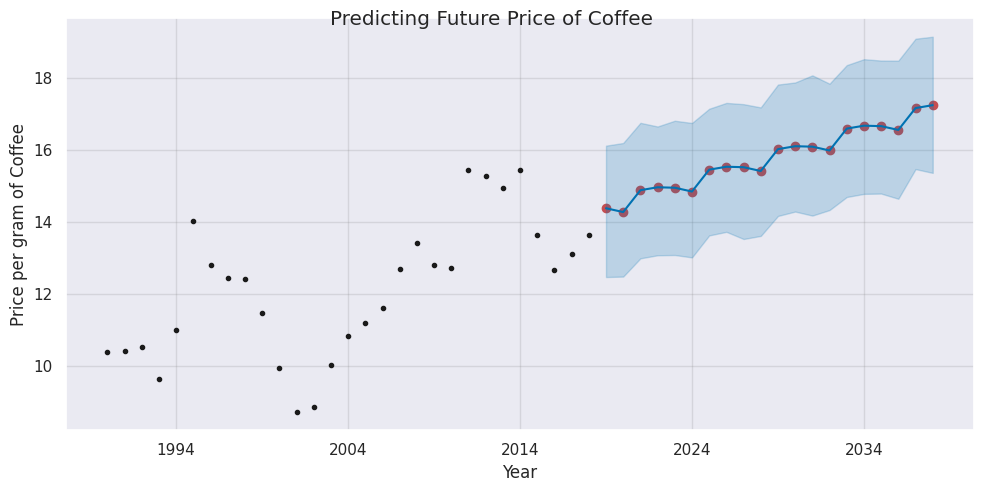

In [45]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(forecast2['ds'], forecast2['yhat'], color='r')
fig = model2.plot(forecast2, ax=ax)
#ax.set_ylim(0, 70000)
plot = plt.suptitle('Predicting Future Price of Coffee')
ax.set_xlabel("Year")
ax.set_ylabel("Price per gram of Coffee")
plt.show()